In [1]:
#numerical python for mathematical functions
import numpy as np

#pandas library
import pandas as pd

#matplotlib library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

### Loading dataset

In [2]:
df=pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Dropping unwanted columns

In [4]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], inplace=True)


In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Checking for duplicates

In [6]:
duplicates=df.duplicated()
if any(duplicates):
    print("There are duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


### Checking for null values

In [7]:
result_data = []

for column in df.columns:
    null_count = df[column].isnull().sum()
    if null_count > 0:
        result_data.append({'Column Name': column, 'Null Count': null_count})
        

if any(result_data):
    result_df = pd.DataFrame(result_data)
    result_df
else:
    print("There are no null values in the dataset")


There are no null values in the dataset


### Checking the datatypes

In [8]:
Datatypes=[]
for column in df.columns:
    Datatypes.append({'Column Name':column,'Data tye':df[column].dtype})

Datatypes=pd.DataFrame(Datatypes)
Datatypes

,Column Name,Data tye
0,Attrition_Flag,object
1,Customer_Age,int64
2,Gender,object
3,Dependent_count,int64
4,Education_Level,object
5,Marital_Status,object
6,Income_Category,object
7,Card_Category,object
8,Months_on_book,int64
9,Total_Relationship_Count,int64


# Data Visualisation

## UNI-VARIATE ANALYSIS FOR NUMERICAL COLUMNS:

In [9]:
num=[]

for column in df.columns:
    if df[column].dtype !='object':
        num.append(column)
print('The numerical columns are:\n')
for i in num:
    print(i)

The numerical columns are:

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


## Customer_Age               

#### Skewness


In [11]:
print("The skewness of customer age is:\n",df['Customer_Age'].skew())
print("The kurtosis of the customer age is:\n",df['Customer_Age'].kurt())

The skewness of customer age is:
 -0.033605016317173456
The kurtosis of the customer age is:
 -0.2886199152745088


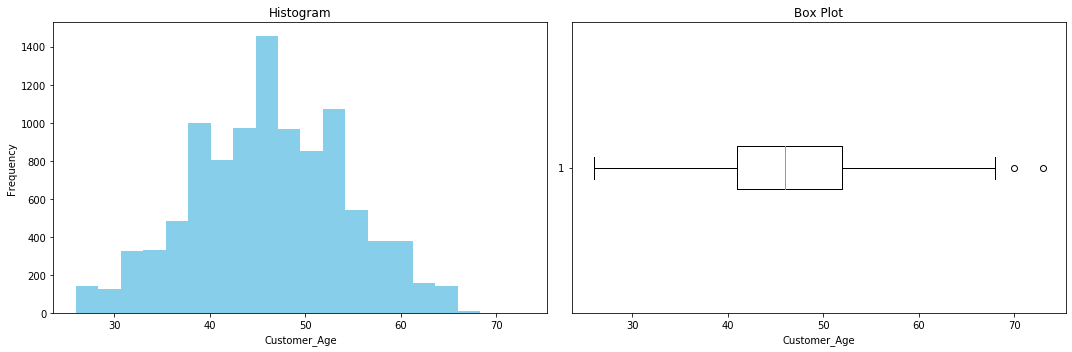

In [12]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Customer_Age', data=df, bins=20, color='skyblue')
axes[0].set_xlabel('Customer_Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Customer_Age'], vert=False)
axes[1].set_xlabel('Customer_Age')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values indicate that the distribution of customer age is approximately symmetric with a relatively flat shape, suggesting that ages are evenly distributed across a wider range without many extreme values.

## Dependent_count

In [13]:
print("The skewness of Dependent count is:\n",df['Dependent_count'].skew())
print("The kurtosis of the Dependent count is:\n",df['Dependent_count'].kurt())

The skewness of Dependent count is:
 -0.020825535616339912
The kurtosis of the Dependent count is:
 -0.6830166530893709


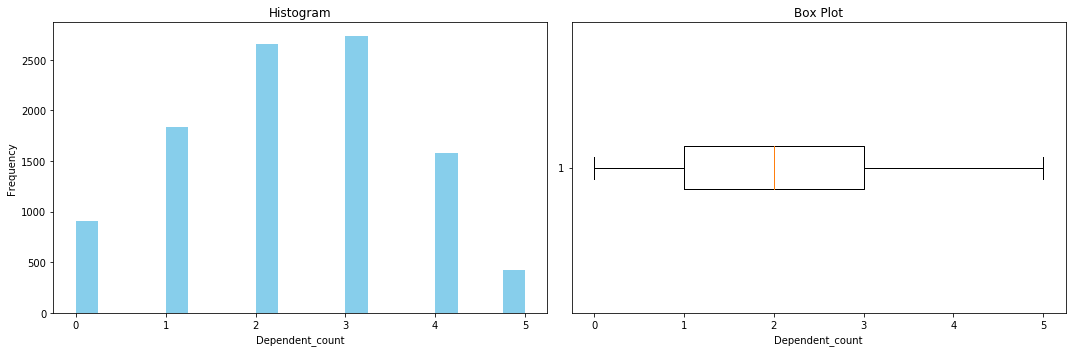

In [14]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Dependent_count', data=df, bins=20, color='skyblue')
axes[0].set_xlabel('Dependent_count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Dependent_count'], vert=False)
axes[1].set_xlabel('Dependent_count')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of the dependent count is approximately symmetric and relatively flat, with counts evenly distributed across a wider range without many extreme values

## Months_on_book

In [15]:
print("The skewness of Months on book  is:\n",df['Months_on_book'].skew())
print("The kurtosis of the Months on book is:\n",df['Months_on_book'].kurt())

The skewness of Months on book  is:
 -0.10656535989402989
The kurtosis of the Months on book is:
 0.40010012019986707


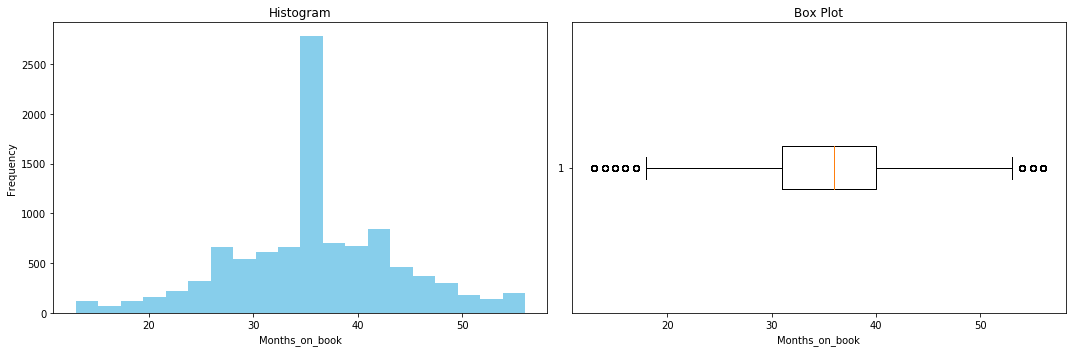

In [16]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Months_on_book', data=df, bins=20, color='skyblue')
axes[0].set_xlabel('Months_on_book')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Months_on_book'], vert=False)
axes[1].set_xlabel('Months_on_book')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Months on book" is slightly left-skewed with a moderately heavy-tailed distribution. While there might be some outliers present, they are not exceptionally strong.

## Total_Relationship_Count

In [17]:
print("The skewness of Total Relationship Count is:\n",df['Total_Relationship_Count'].skew())
print("The kurtosis of the Total Relationship Count is:\n",df['Total_Relationship_Count'].kurt())

The skewness of Total Relationship Count is:
 -0.16245241498173682
The kurtosis of the Total Relationship Count is:
 -1.0061305074402487


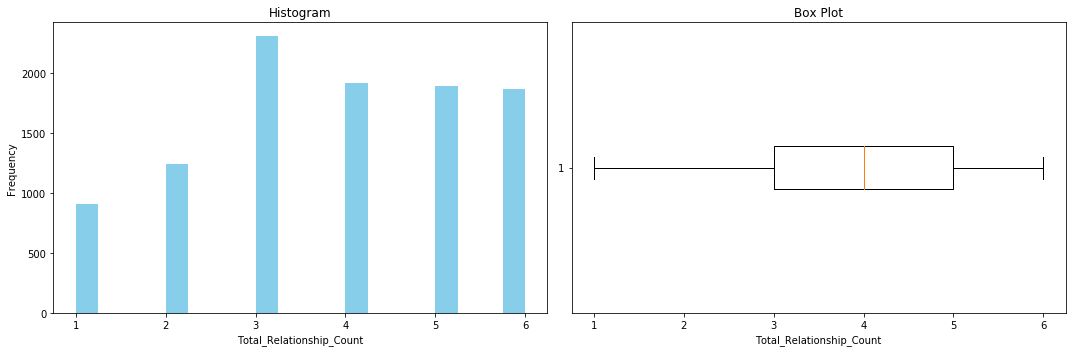

In [18]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Relationship_Count', data=df, bins=20, color='skyblue')
axes[0].set_xlabel('Total_Relationship_Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Relationship_Count'], vert=False)
axes[1].set_xlabel('Total_Relationship_Count')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Total Relationship Count" is slightly left-skewed and has a flatter distribution with fewer outliers compared to a normal distribution.

## Months_Inactive_12_mon

In [19]:
print("The skewness of Months_Inactive_12_mon is:\n",df['Months_Inactive_12_mon'].skew())
print("The kurtosis of the Months_Inactive_12_mon is:\n",df['Months_Inactive_12_mon'].kurt())

The skewness of Months_Inactive_12_mon is:
 0.6330611289713137
The kurtosis of the Months_Inactive_12_mon is:
 1.098522613771138


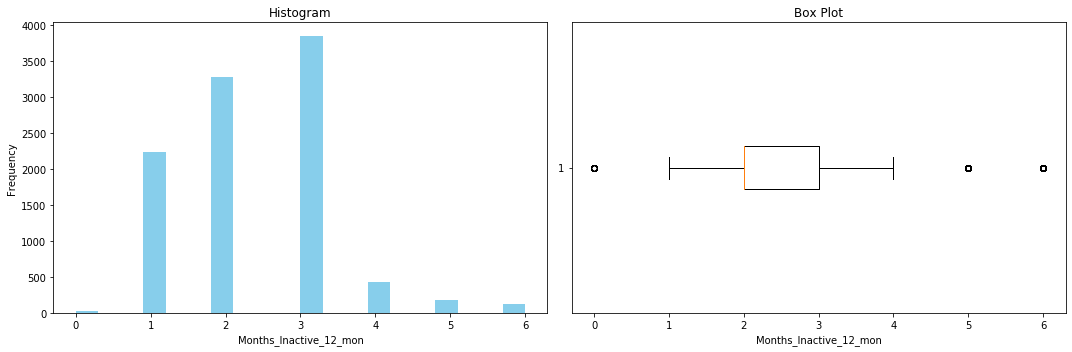

In [20]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Months_Inactive_12_mon', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Months_Inactive_12_mon')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Months_Inactive_12_mon'], vert=False)
axes[1].set_xlabel('Months_Inactive_12_mon')
axes[1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Months_Inactive_12_mon" is right-skewed with a moderately heavy-tailed distribution and a sharp peak. This indicates that there might be more extreme values or outliers present, particularly on the higher end of the distribution.






## Contacts_Count_12_mon

In [21]:
print("The skewness of Contacts_Count_12_mon is:\n",df['Contacts_Count_12_mon'].skew())
print("The kurtosis of the Contacts_Count_12_mon is:\n",df['Contacts_Count_12_mon'].kurt())

The skewness of Contacts_Count_12_mon is:
 0.011005626218976492
The kurtosis of the Contacts_Count_12_mon is:
 0.0008626566254124057


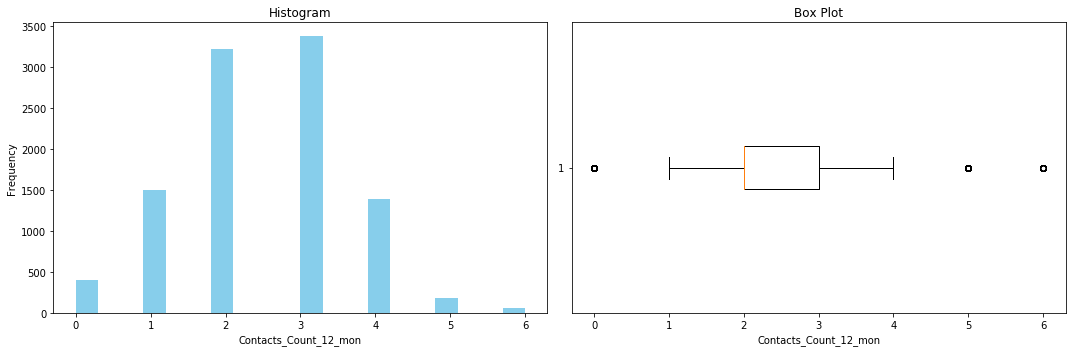

In [22]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Contacts_Count_12_mon', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Contacts_Count_12_mon')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Contacts_Count_12_mon'], vert=False)
axes[1].set_xlabel('Contacts_Count_12_mon')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Contacts_Count_12_mon" is approximately symmetric, with a shape similar to that of a normal distribution. There are no pronounced tails or extreme outliers present in the data.

## Credit_Limit

In [23]:
print("The skewness of Credit_Limit is:\n",df['Credit_Limit'].skew())
print("The kurtosis of the Credit_Limit is:\n",df['Credit_Limit'].kurt())

The skewness of Credit_Limit is:
 1.666725807993647
The kurtosis of the Credit_Limit is:
 1.8089893357093434


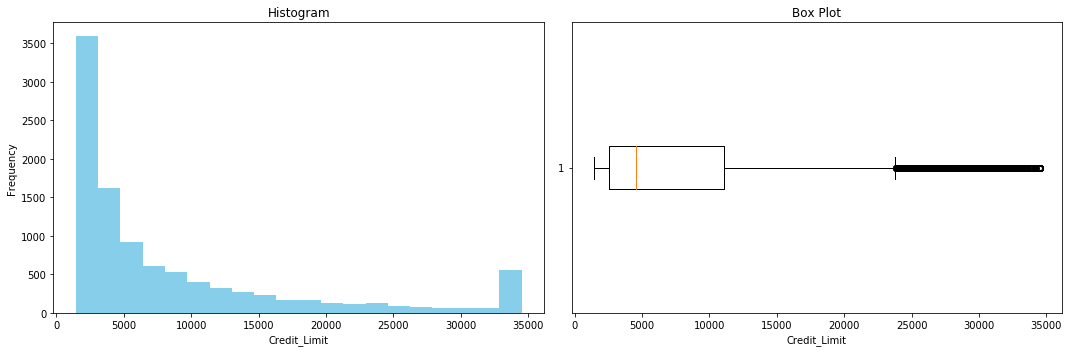

In [24]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Credit_Limit', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Credit_Limit')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Credit_Limit'], vert=False)
axes[1].set_xlabel('Credit_Limit')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Credit_Limit" is heavily right-skewed with a sharp peak and heavier tails. This indicates that there are likely many observations with lower credit limits and some extreme outliers with higher credit limits.

## Total_Revolving_Bal

In [25]:
print("The skewness of Total_Revolving_Bal is:\n",df['Total_Revolving_Bal'].skew())
print("The kurtosis of the Total_Revolving_Bal is:\n",df['Total_Revolving_Bal'].kurt())

The skewness of Total_Revolving_Bal is:
 -0.14883725028007228
The kurtosis of the Total_Revolving_Bal is:
 -1.145991781532597


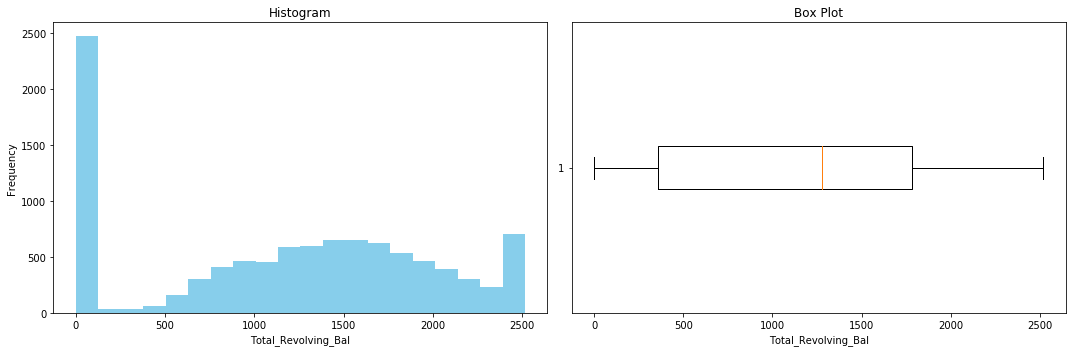

In [26]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Revolving_Bal', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Total_Revolving_Bal')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Revolving_Bal'], vert=False)
axes[1].set_xlabel('Total_Revolving_Bal')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Total_Revolving_Bal" is approximately symmetric or slightly left-skewed with a relatively flat shape and fewer outliers.






## Avg_Open_To_Buy

In [27]:
print("The skewness of the Avg_Open_To_Buy is:\n",df['Avg_Open_To_Buy'].skew())
print("The kurtosis of the Avg_Open_To_Buy is:\n",df['Avg_Open_To_Buy'].kurt())

The skewness of the Avg_Open_To_Buy is:
 1.6616965459311595
The kurtosis of the Avg_Open_To_Buy is:
 1.7986172957122664


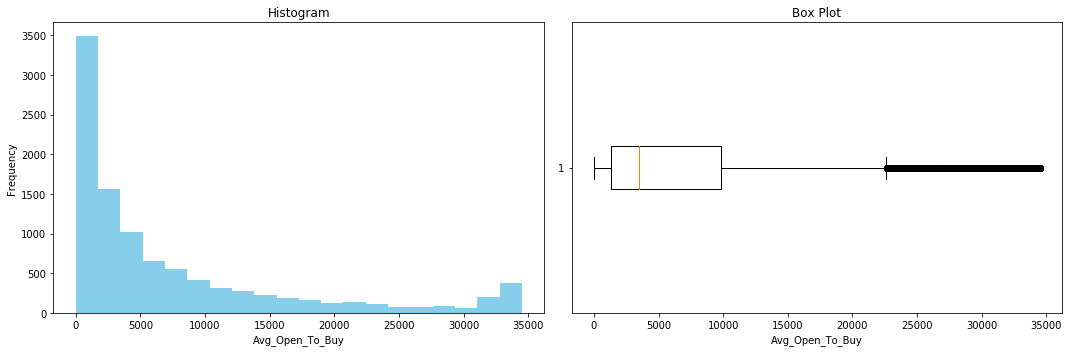

In [28]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Avg_Open_To_Buy', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Avg_Open_To_Buy')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Avg_Open_To_Buy'], vert=False)
axes[1].set_xlabel('Avg_Open_To_Buy')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Avg_Open_To_Buy" is heavily right-skewed with a sharp peak and heavier tails. This indicates that there are likely many observations with lower values and some extreme outliers with higher values.

## Total_Amt_Chng_Q4_Q1

In [29]:
print("The skewness of the Total_Amt_Chng_Q4_Q1 is:\n",df['Total_Amt_Chng_Q4_Q1'].skew())
print("The kurtosis of the Total_Amt_Chng_Q4_Q1 is:\n",df['Total_Amt_Chng_Q4_Q1'].kurt())

The skewness of the Total_Amt_Chng_Q4_Q1 is:
 1.7320634114286024
The kurtosis of the Total_Amt_Chng_Q4_Q1 is:
 9.993501178599232


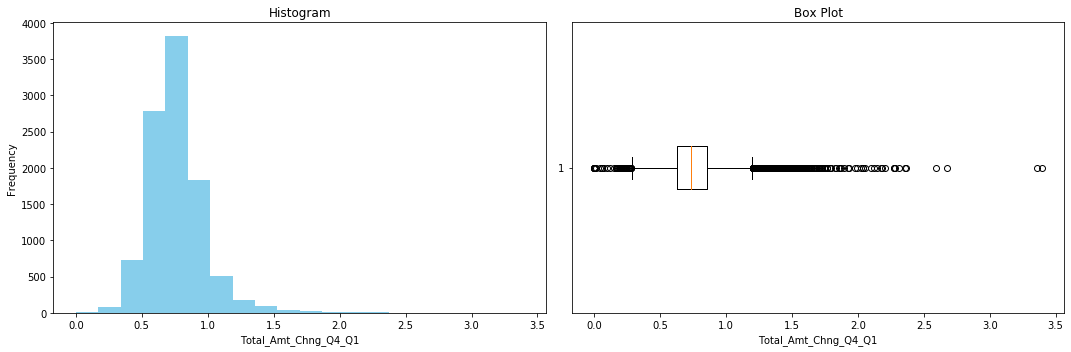

In [30]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Amt_Chng_Q4_Q1', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Total_Amt_Chng_Q4_Q1')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Amt_Chng_Q4_Q1'], vert=False)
axes[1].set_xlabel('Total_Amt_Chng_Q4_Q1')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Total_Amt_Chng_Q4_Q1" is heavily right-skewed with an extremely sharp peak and extremely heavy tails. This indicates that there are likely many observations with lower values and a significant number of extreme outliers with higher values.






## Total_Trans_Amt

In [31]:
print("The skewness of the Total_Trans_Amt is:\n",df['Total_Trans_Amt'].skew())
print("The kurtosis of the Total_Trans_Amt is:\n",df['Total_Trans_Amt'].kurt())

The skewness of the Total_Trans_Amt is:
 2.0410034025756936
The kurtosis of the Total_Trans_Amt is:
 3.8940234056985163


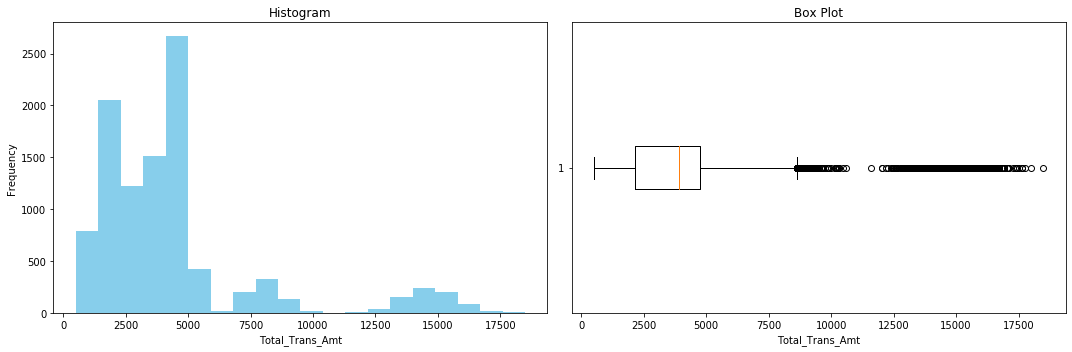

In [32]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Trans_Amt', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Total_Trans_Amt')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Trans_Amt'], vert=False)
axes[1].set_xlabel('Total_Trans_Amt')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Total_Trans_Amt" is heavily right-skewed with a sharp peak and heavier tails. This indicates that there are likely many observations with lower values and some extreme outliers with higher values.






## Total_Trans_Ct

In [33]:
print("The skewness of the Total_Trans_Ct is:\n",df['Total_Trans_Ct'].skew())
print("The kurtosis of the Total_Trans_Ct is:\n",df['Total_Trans_Ct'].kurt())

The skewness of the Total_Trans_Ct is:
 0.15367306849872275
The kurtosis of the Total_Trans_Ct is:
 -0.36716324112759624


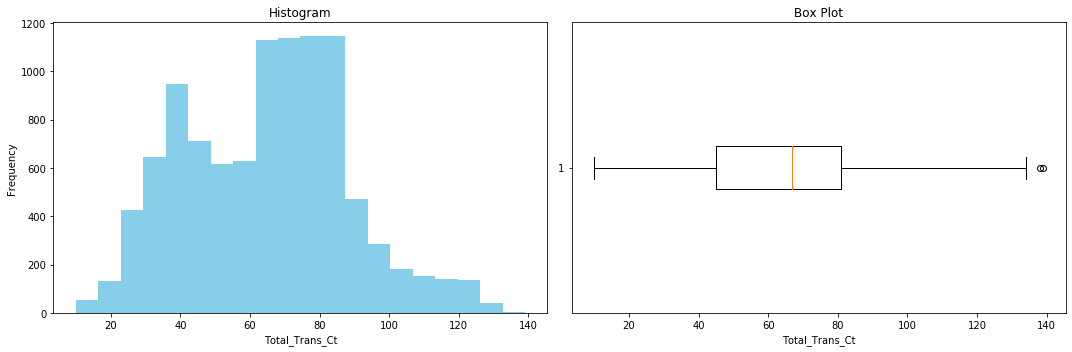

In [34]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Trans_Ct', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Total_Trans_Ct')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Trans_Ct'], vert=False)
axes[1].set_xlabel('Total_Trans_Ct')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

|The skewness and kurtosis values suggest that the distribution of "Total_Trans_Ct" is approximately symmetric or slightly right-skewed with a relatively flat shape and fewer outliers.

## Total_Ct_Chng_Q4_Q1


In [35]:
print("The skewness of the Total_Ct_Chng_Q4_Q1 is:\n",df['Total_Ct_Chng_Q4_Q1'].skew())
print("The kurtosis of the Total_Ct_Chng_Q4_Q1 is:\n",df['Total_Ct_Chng_Q4_Q1'].kurt())

The skewness of the Total_Ct_Chng_Q4_Q1 is:
 2.0640305679077477
The kurtosis of the Total_Ct_Chng_Q4_Q1 is:
 15.689292901407043


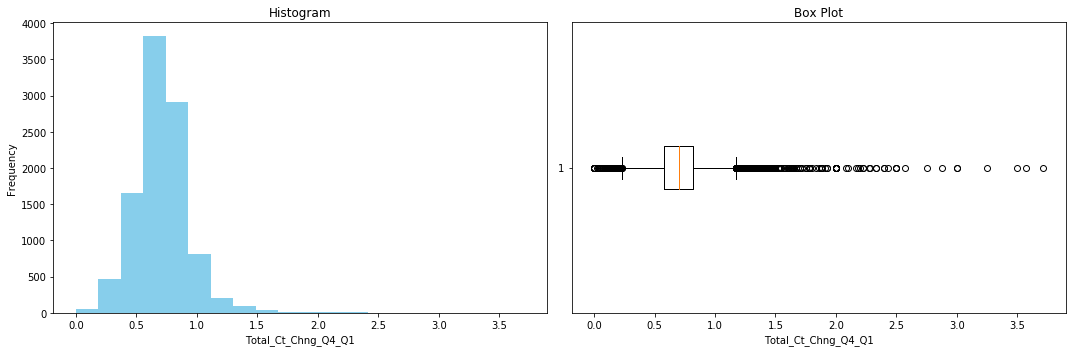

In [36]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Total_Ct_Chng_Q4_Q1', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Total_Ct_Chng_Q4_Q1')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Total_Ct_Chng_Q4_Q1'], vert=False)
axes[1].set_xlabel('Total_Ct_Chng_Q4_Q1')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Total_Ct_Chng_Q4_Q1" is heavily right-skewed with an extremely sharp peak and extremely heavy tails. This indicates that there are likely many observations with lower values and a significant number of extreme outliers with higher values.

## Avg_Utilization_Ratio

In [37]:
print("The skewness of the Avg_Utilization_Ratio is:\n",df['Avg_Utilization_Ratio'].skew())
print("The kurtosis of the Avg_Utilization_Ratio is:\n",df['Avg_Utilization_Ratio'].kurt())

The skewness of the Avg_Utilization_Ratio is:
 0.7180079967731994
The kurtosis of the Avg_Utilization_Ratio is:
 -0.7949719514980287


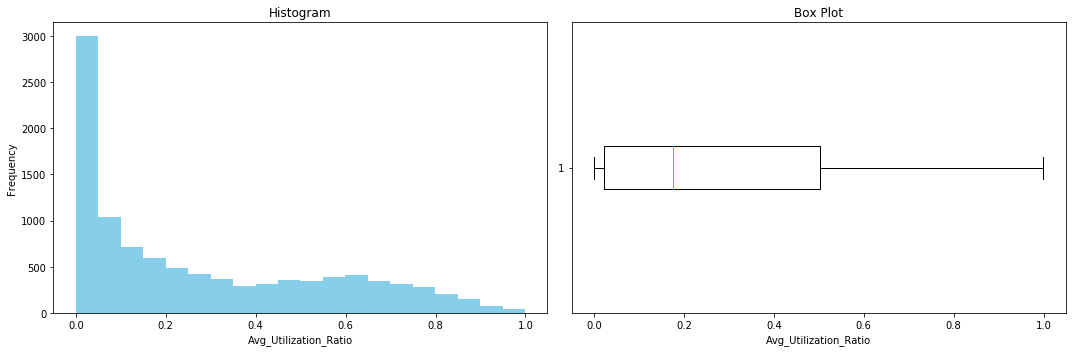

In [38]:
# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

# Generate histograms and box plots
# Histogram
axes[0].hist(x='Avg_Utilization_Ratio', data=df,bins=20,color='skyblue')
axes[0].set_xlabel('Avg_Utilization_Ratio')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

# Box plot
axes[1].boxplot(x=df['Avg_Utilization_Ratio'], vert=False)
axes[1].set_xlabel('Avg_Utilization_Ratio')
axes[1].set_title('Box Plot')


 
# Show the plots
plt.tight_layout()
plt.show()

The skewness and kurtosis values suggest that the distribution of "Avg_Utilization_Ratio" is right-skewed with a moderately flat shape and fewer outliers.

## UNI-VARIATE ANALYSIS FOR CATEGORICAL COLUMNS:

In [39]:
cat=[]

for column in df.columns:
    if df[column].dtype =='object':
        cat.append(column)
print('The categorical columns are:\n')
for i in cat:
    print(i)

The categorical columns are:

Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [40]:
df.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


## Attrition_Flag

In [41]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

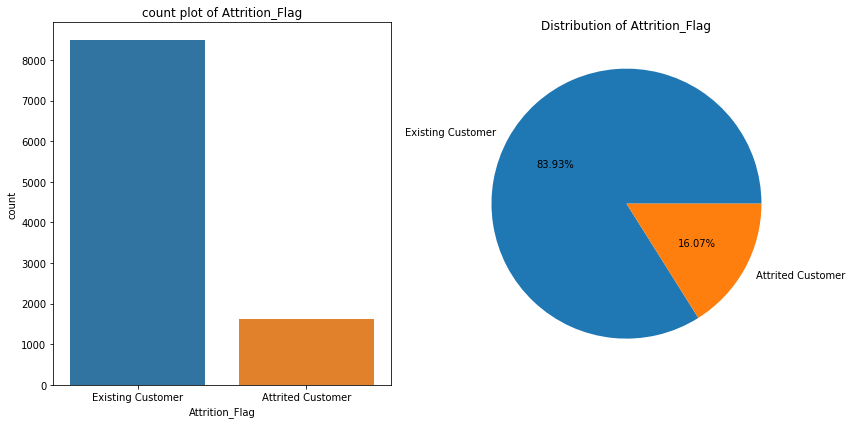

In [42]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Attrition_Flag',data=df,ax=axes[0])
axes[0].set_xlabel('Attrition_Flag')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Attrition_Flag')

# Pie chart using pandas plot
df['Attrition_Flag'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Attrition_Flag')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 2 unique values. The most frequent value is "Existing Customer" with a frequency of 8,500.

The majority of customers in the dataset are existing customers.

## Gender

In [43]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

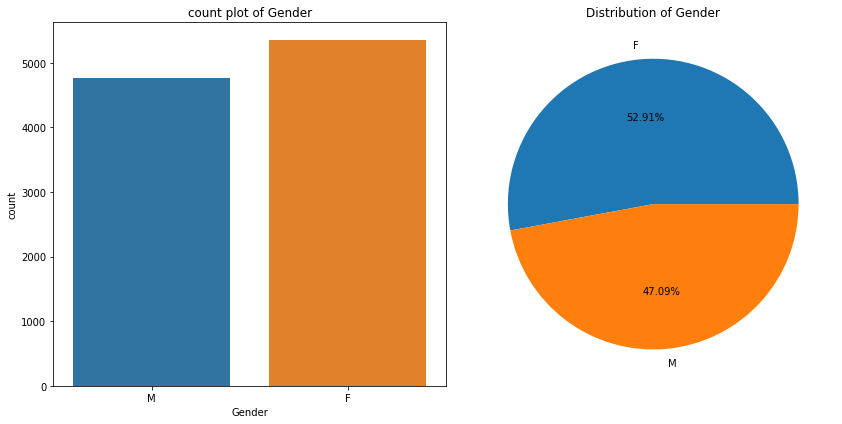

In [44]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Gender',data=df,ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Gender')

# Pie chart using pandas plot
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Gender')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 2 unique values. The most frequent value is "F" (indicating female) with a frequency of 5,358.

There are more number of female customers compared to males in the dataset.

## Education_Level

In [45]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

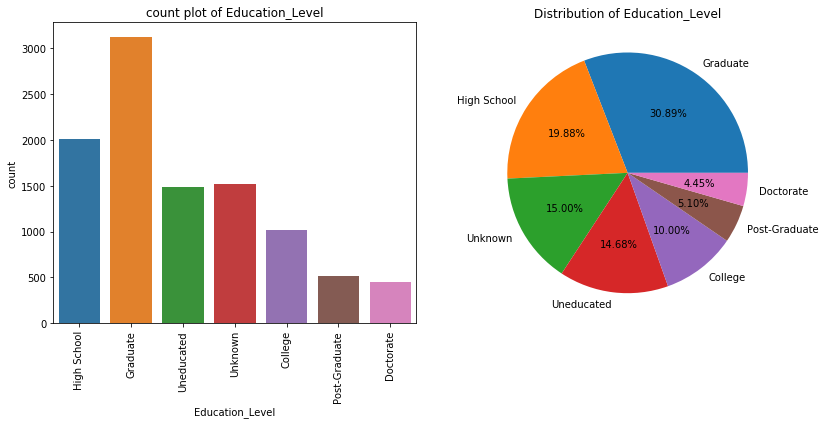

In [46]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Education_Level',data=df,ax=axes[0])
axes[0].set_xlabel('Education_Level')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Education_Level')
axes[0].tick_params(axis='x', rotation=90)

# Pie chart using pandas plot
df['Education_Level'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Education_Level')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 7 unique education levels. The most frequent education level is "Graduate" with a frequency of 3,128.

A significant portion of customers in the dataset have a graduate level of education.

## Marital_Status

In [47]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

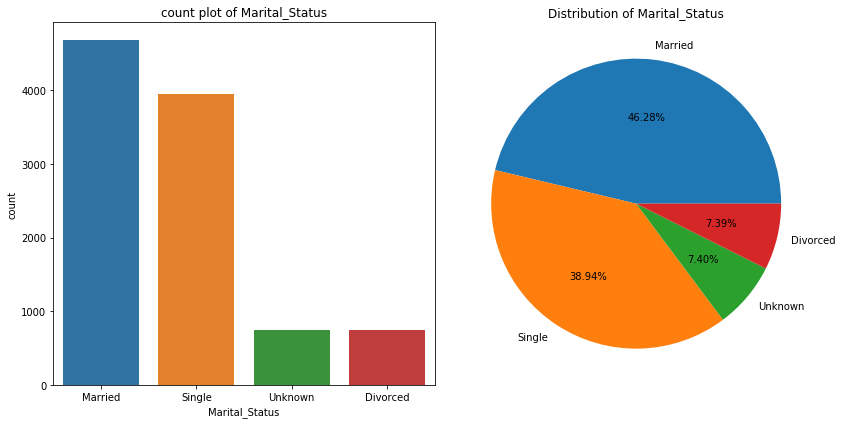

In [48]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Marital_Status',data=df,ax=axes[0])
axes[0].set_xlabel('Marital_Status')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Marital_Status')


# Pie chart using pandas plot
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Marital_Status')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 4 unique marital statuses. The most frequent marital status is "Married" with a frequency of 4,687.

A considerable number of customers in the dataset are married.

## Income_Category

In [49]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

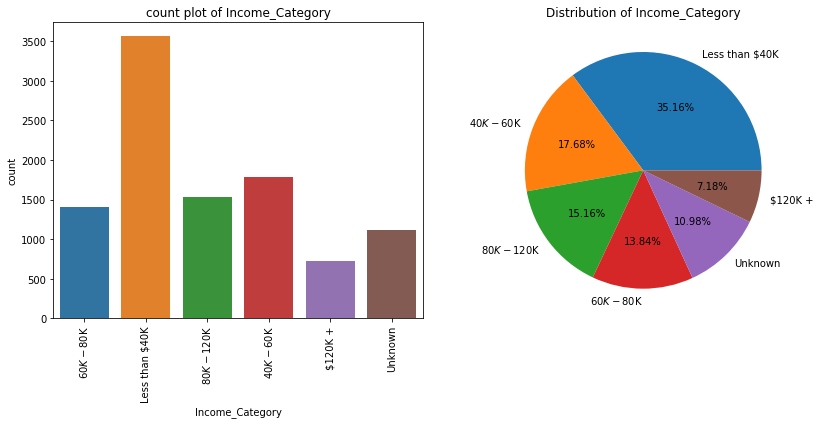

In [50]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Income_Category',data=df,ax=axes[0])
axes[0].set_xlabel('Income_Category')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Income_Category')
axes[0].tick_params(axis='x', rotation=90)

# Pie chart using pandas plot
df['Income_Category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Income_Category')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 6 unique income categories. The most frequent income category is "Less than $40K" with a frequency of 3,561.

A significant proportion of customers in the dataset have incomes less than $40,000.

## Card_Category

In [51]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

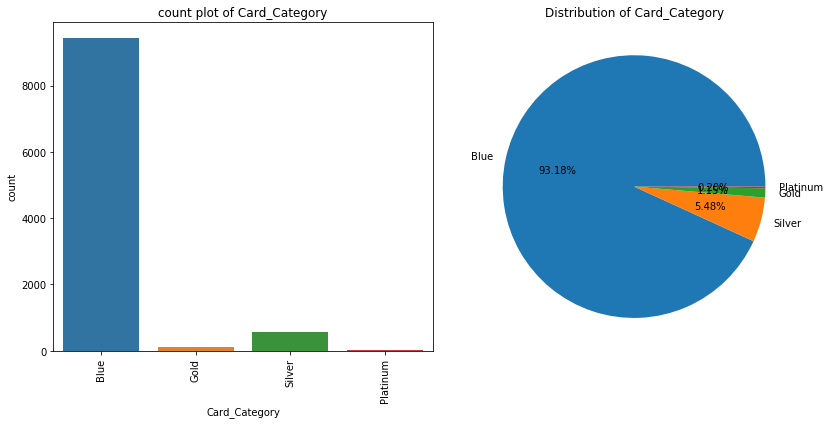

In [52]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='Card_Category',data=df,ax=axes[0])
axes[0].set_xlabel('Card_Category')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of Card_Category')
axes[0].tick_params(axis='x', rotation=90)

# Pie chart using pandas plot
df['Card_Category'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of Card_Category')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

There are 10,127 records in total, with 4 unique card categories. The most frequent card category is "Blue" with a frequency of 9,436.

The majority of customers in the dataset have Blue cards, which might be the standard card category.

# KEY INSIGHTS:


### Demographic Analysis:

The average age of the customers is approximately 46 years, with a minimum age of 26 and a maximum age of 73.

The majority of customers are female, with approximately 53% of the total customer base.

The average number of dependents per customer is around 2, indicating varied family sizes among the customers.

Education level varies among customers, with the majority being graduates.

Most customers are married, comprising nearly half of the customer base.

### Financial Profile:

Income distribution shows that a significant portion of customers earns less than $40,000 annually.

The majority of customers hold Blue cards, indicating the prevalence of standard card types among the customer base.

### Relationship Metrics:

On average, customers have around 3-4 relationships with our bank, with a minimum of 1 and a maximum of 6 relationships.

The average tenure of customers with the bank is approximately 36 months, with some variability in the duration of 
relationships.

### Engagement and Activity:

Customers are relatively active, with an average of around 2-3 months of inactivity within the last 12 months.

The average number of contacts made by the bank with customers in the last 12 months is approximately 2-3 times.

### Credit Behavior:

The average credit limit for customers is approximately $8,631, with some variability in credit limits across the customer base.

Revolving balances vary among customers, with an average revolving balance of around $1,163.

Customers have an average open-to-buy amount of approximately $7,469, indicating available credit within their limits.

The average utilization ratio of credit among customers is approximately 27%, suggesting moderate utilization of available credit lines.

### Transaction Patterns:

Customers conduct an average of around 65 transactions, with some variability in transaction counts.

The average total transaction amount is approximately $4,404, indicating varying spending patterns among customers.

Customers exhibit an average change in total transaction amount from Q4 to Q1 of approximately 76%.

### Customer Behavior Changes:

The average change in the total number of transactions from Q4 to Q1 is approximately 71%, suggesting fluctuations in customer spending behavior.



# BI-VARIATR ANALYSIS

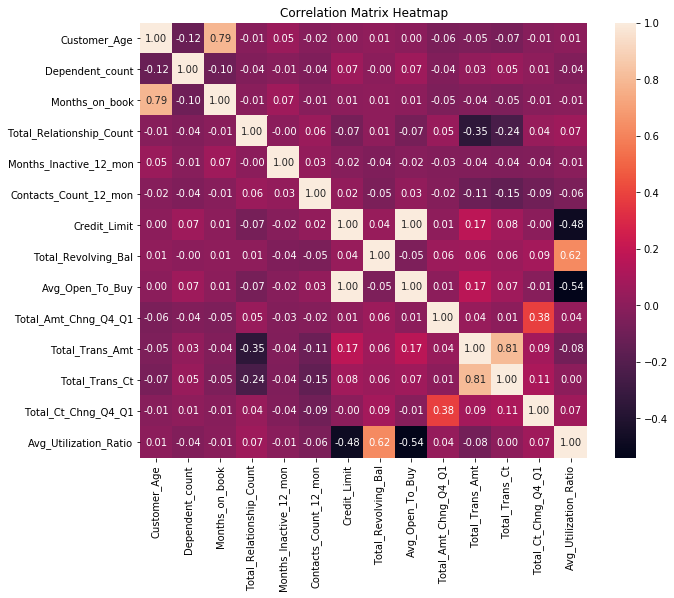

In [53]:
# Generate the correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, fmt='.2f')

# Customize the plot appearance (optional)
plt.title('Correlation Matrix Heatmap')  # Add a title
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()


## Customer age and months on book

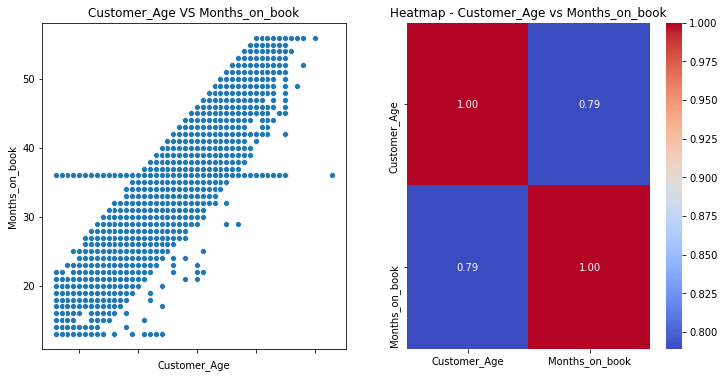

In [54]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Customer_Age'],y=df['Months_on_book'],ax=axes[0])
axes[0].set_xlabel('Customer_Age')
axes[0].set_ylabel('Months_on_book')
axes[0].set_title('Customer_Age VS Months_on_book')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Customer_Age" and "Months_on_book" columns
sns.heatmap(df[['Customer_Age', 'Months_on_book']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Customer_Age vs Months_on_book")


# Display the plot
plt.show()

In [55]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Customer_Age'], df['Months_on_book'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.78891235899306
p-value: 0.0


The strong positive correlation between customer age and months on book suggests that as customers age, they tend to have been with the bank for a longer duration. This finding is intuitive and aligns with the expectation that customers who have been with the bank for a longer time are likely to be older.

# Credit_Limit and Avg_Open_To_Buy

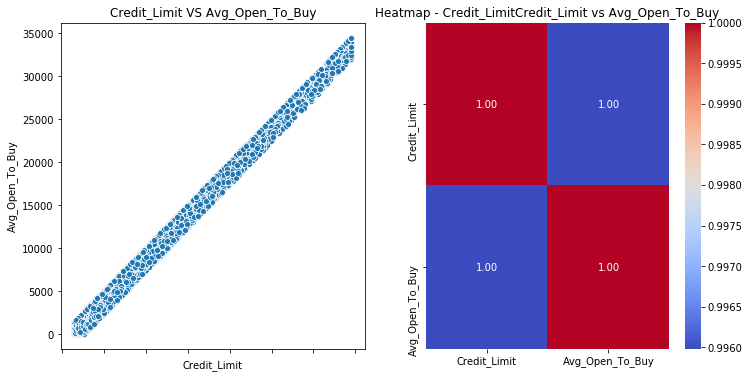

In [56]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Open_To_Buy'],ax=axes[0])
axes[0].set_xlabel('Credit_Limit')
axes[0].set_ylabel('Avg_Open_To_Buy')
axes[0].set_title('Credit_Limit VS Avg_Open_To_Buy')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Credit_Limit" and "Avg_Open_To_Buy" columns
sns.heatmap(df[['Credit_Limit', 'Avg_Open_To_Buy']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Credit_LimitCredit_Limit vs Avg_Open_To_Buy")


# Display the plot
plt.show()

In [57]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Credit_Limit'], df['Avg_Open_To_Buy'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.9959805439320051
p-value: 0.0


The strong correlation implies that as the credit limit increases, so does the available credit (Avg_Open_To_Buy), which may influence customer spending behavior and financial decisions.

## Total_Revolving_Bal and Avg_Utilization_Ratio

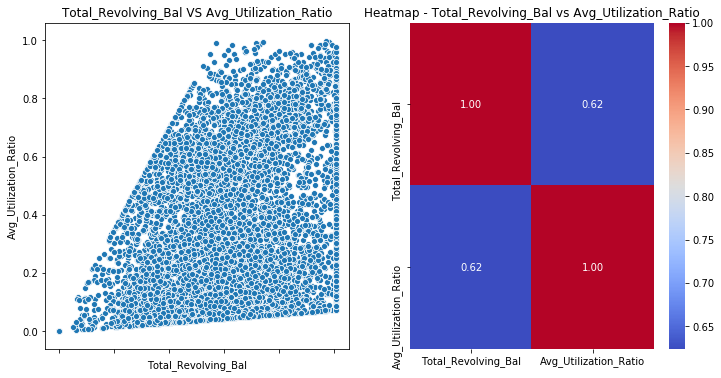

In [58]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Total_Revolving_Bal'],y=df['Avg_Utilization_Ratio'],ax=axes[0])
axes[0].set_xlabel('Total_Revolving_Bal')
axes[0].set_ylabel('Avg_Utilization_Ratio')
axes[0].set_title('Total_Revolving_Bal VS Avg_Utilization_Ratio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Total_Revolving_Bal" and "Avg_Utilization_Ratio" columns
sns.heatmap(df[['Total_Revolving_Bal', 'Avg_Utilization_Ratio']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Total_Revolving_Bal vs Avg_Utilization_Ratio")


# Display the plot
plt.show()

In [59]:
correlation, p_value = pearsonr(df['Total_Revolving_Bal'], df['Avg_Utilization_Ratio'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.6240219910059126
p-value: 0.0


The strong positive correlation between total revolving balance and average utilization ratio suggests that customers who have higher revolving balances tend to also have higher average utilization ratios. This implies that customers who carry larger balances on their credit cards relative to their credit limits also tend to utilize a greater proportion of their available credit.

## Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1

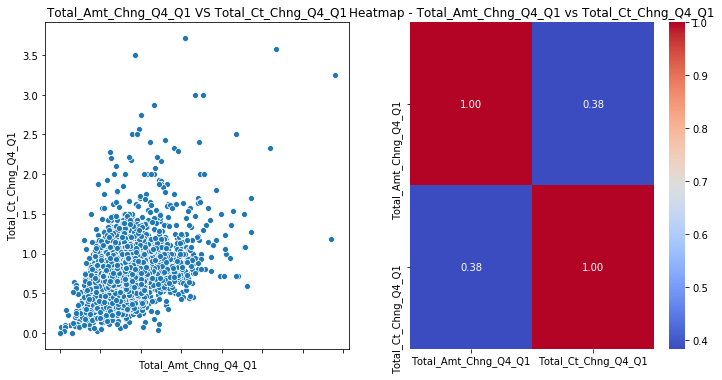

In [60]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Total_Amt_Chng_Q4_Q1'],y=df['Total_Ct_Chng_Q4_Q1'],ax=axes[0])
axes[0].set_xlabel('Total_Amt_Chng_Q4_Q1')
axes[0].set_ylabel('Total_Ct_Chng_Q4_Q1')
axes[0].set_title('Total_Amt_Chng_Q4_Q1 VS Total_Ct_Chng_Q4_Q1')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Total_Amt_Chng_Q4_Q1" and "Total_Ct_Chng_Q4_Q1" columns
sns.heatmap(df[['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Total_Amt_Chng_Q4_Q1 vs Total_Ct_Chng_Q4_Q1")


# Display the plot
plt.show()

In [61]:
correlation, p_value = pearsonr(df['Total_Amt_Chng_Q4_Q1'], df['Total_Ct_Chng_Q4_Q1'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.38418925603371523
p-value: 0.0


The customers who increase their total transaction amount from Q4 to Q1 also tend to increase their total transaction count over the same period. This could indicate a pattern of increased spending and engagement with the bank's products and services among these customers.

## Total_Trans_Amt and Total_Trans_Ct

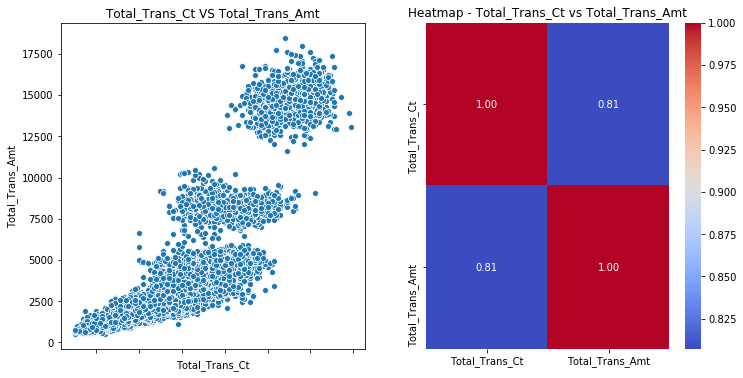

In [62]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Total_Trans_Ct'],y=df['Total_Trans_Amt'],ax=axes[0])
axes[0].set_xlabel('Total_Trans_Ct')
axes[0].set_ylabel('Total_Trans_Amt')
axes[0].set_title('Total_Trans_Ct VS Total_Trans_Amt')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Total_Trans_Ct" and "Total_Trans_Amt" columns
sns.heatmap(df[['Total_Trans_Ct', 'Total_Trans_Amt']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Total_Trans_Ct vs Total_Trans_Amt")


# Display the plot
plt.show()

In [63]:
correlation, p_value = pearsonr(df['Total_Trans_Ct'], df['Total_Trans_Amt'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.8071920346514359
p-value: 0.0


The customers who conduct more transactions also tend to have higher total transaction amounts, and vice versa. This could be attributed to the fact that customers who make more frequent transactions are likely to spend more overall.

## Total_Relationship_Count and Total_Trans_Amt

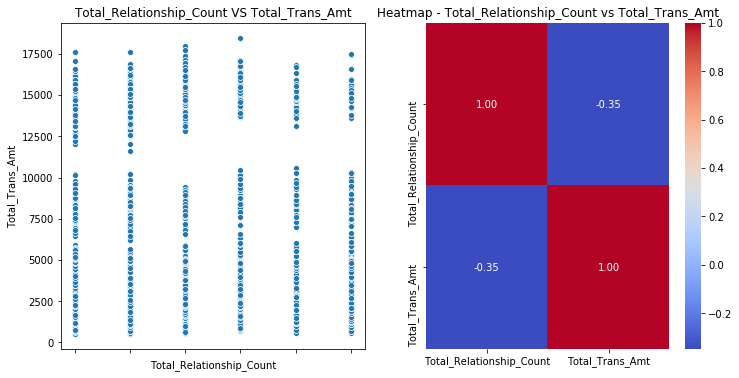

In [64]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Total_Relationship_Count'],y=df['Total_Trans_Amt'],ax=axes[0])
axes[0].set_xlabel('Total_Relationship_Count')
axes[0].set_ylabel('Total_Trans_Amt')
axes[0].set_title('Total_Relationship_Count VS Total_Trans_Amt')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Total_Relationship_Count" and "Total_Trans_Amt" columns
sns.heatmap(df[['Total_Relationship_Count', 'Total_Trans_Amt']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Total_Relationship_Count vs Total_Trans_Amt")


# Display the plot
plt.show()

In [65]:
correlation, p_value = pearsonr(df['Total_Relationship_Count'], df['Total_Trans_Amt'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.3472288796370107
p-value: 7.630089210190727e-285


The customers with a higher number of relationships with the bank tend to have lower total transaction amounts, and vice versa. One possible explanation for this relationship is that customers with fewer relationships may engage in more transactional activity as they consolidate their banking needs, whereas customers with a higher number of relationships may distribute their transactions across multiple accounts or channels.

## Credit_Limit and Avg_Utilization_Ratio

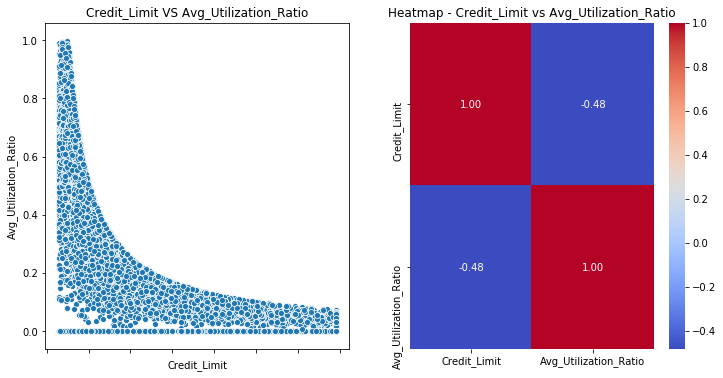

In [66]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Credit_Limit'],y=df['Avg_Utilization_Ratio'],ax=axes[0])
axes[0].set_xlabel('Credit_Limit')
axes[0].set_ylabel('Avg_Utilization_Ratio')
axes[0].set_title('Credit_Limit VS Avg_Utilization_Ratio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Credit_Limit" and "Avg_Utilization_Ratio" columns
sns.heatmap(df[['Credit_Limit', 'Avg_Utilization_Ratio']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Credit_Limit vs Avg_Utilization_Ratio")


# Display the plot
plt.show()

In [67]:
correlation, p_value = pearsonr(df['Credit_Limit'], df['Avg_Utilization_Ratio'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.48296507141745026
p-value: 0.0


The customers who have been granted higher credit limits relative to their spending, tend to utilize a smaller proportion of their available credit, while those with lower credit limits may utilize a larger proportion of their available credit.

## Avg_Open_To_Buy and Avg_Utilization_Ratio

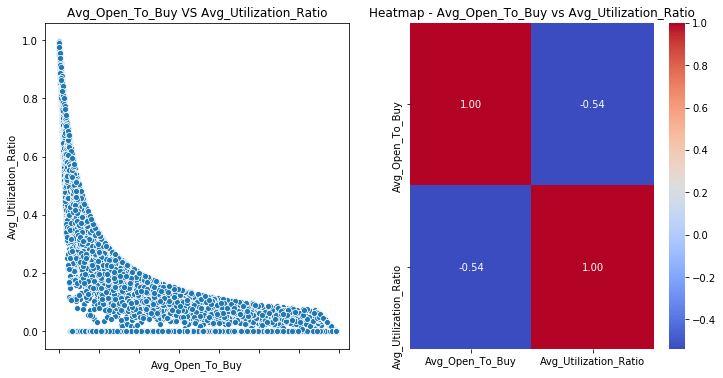

In [68]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['Avg_Open_To_Buy'],y=df['Avg_Utilization_Ratio'],ax=axes[0])
axes[0].set_xlabel('Avg_Open_To_Buy')
axes[0].set_ylabel('Avg_Utilization_Ratio')
axes[0].set_title('Avg_Open_To_Buy VS Avg_Utilization_Ratio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "Avg_Open_To_Buy" and "Avg_Utilization_Ratio" columns
sns.heatmap(df[['Avg_Open_To_Buy', 'Avg_Utilization_Ratio']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Avg_Open_To_Buy vs Avg_Utilization_Ratio")


# Display the plot
plt.show()

In [69]:
correlation, p_value = pearsonr(df['Avg_Open_To_Buy'], df['Avg_Utilization_Ratio'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.5388077476174666
p-value: 0.0


The customers with more available credit relative to their spending tend to have lower utilization ratios, indicating healthier credit behavior. On the other hand, customers with less available credit may have higher utilization ratios, which could indicate potential financial strain or higher credit risk.

## Attrition_Flag and Gender

the crosstab is:
 Gender                F     M
Attrition_Flag               
Attrited Customer   930   697
Existing Customer  4428  4072


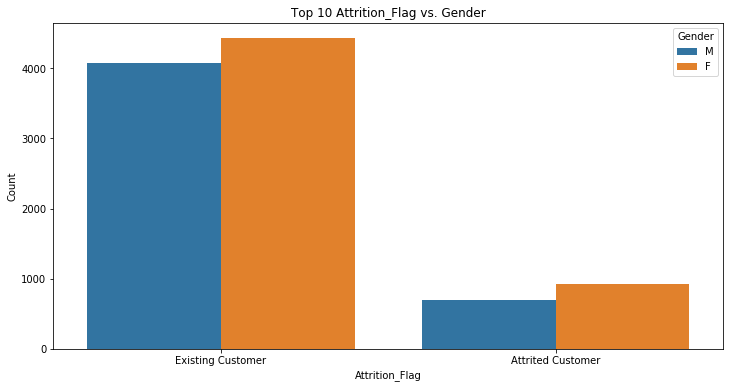

In [70]:
# Tabulation
tab = pd.crosstab(df['Attrition_Flag'], df['Gender'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition_Flag', hue='Gender')
plt.title("Top 10 Attrition_Flag vs. Gender")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.legend(title='Gender', loc='upper right')
plt.show()

In [71]:
import scipy.stats as stats

# Create a contingency table of 'Gender' and 'Attrition_Flag'
contingency_table = pd.crosstab(df['Gender'], df['Attrition_Flag'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 13.86561370063734
P-Value: 0.00019635846717310307


The significant association between attrition status and gender implies that gender plays a role in customer attrition.

## Attrition_Flag and Education_Level

the crosstab is:
 Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   

Education_Level    Uneducated  Unknown  
Attrition_Flag                          
Attrited Customer         237      256  
Existing Customer        1250     1263  


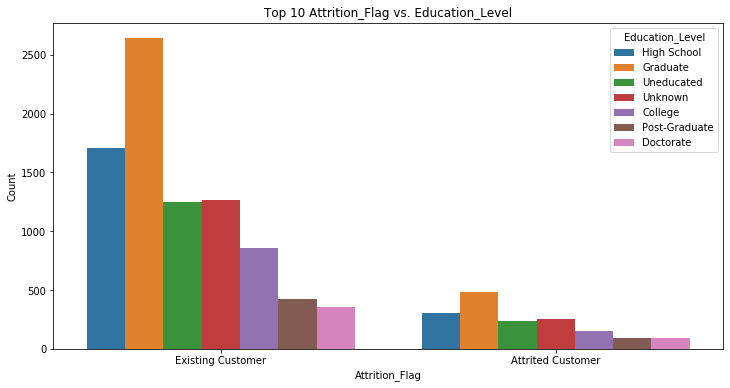

In [72]:
# Tabulation
tab = pd.crosstab(df['Attrition_Flag'], df['Education_Level'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition_Flag', hue='Education_Level')
plt.title("Top 10 Attrition_Flag vs. Education_Level")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.legend(title='Education_Level', loc='upper right')
plt.show()

In [73]:
# Create a contingency table of 'Education_Level' and 'Attrition_Flag'
contingency_table = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 12.511205404830507
P-Value: 0.05148913147336634


Although the p-value is slightly above 0.05, suggesting only moderate evidence against the null hypothesis of independence, there still may be meaningful differences in attrition rates across education levels.

## Attrition_Flag and Marital_Status

the crosstab is:
 Marital_Status     Divorced  Married  Single  Unknown
Attrition_Flag                                       
Attrited Customer       121      709     668      129
Existing Customer       627     3978    3275      620


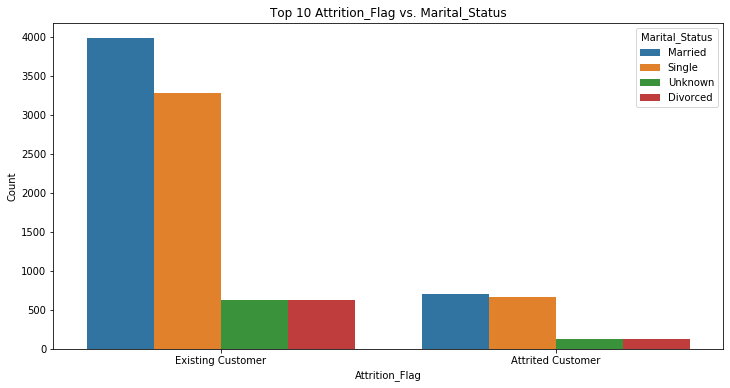

In [74]:
# Tabulation
tab = pd.crosstab(df['Attrition_Flag'], df['Marital_Status'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition_Flag', hue='Marital_Status')
plt.title("Top 10 Attrition_Flag vs. Marital_Status")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.legend(title='Marital_Status', loc='upper right')
plt.show()

In [75]:
# Create a contingency table of 'Marital_Status' and 'Attrition_Flag'
contingency_table = pd.crosstab(df['Attrition_Flag'], df['Marital_Status'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 6.056097396726619
P-Value: 0.10891263394840227


The lack of statistical significance suggests that there may not be a strong relationship between marital status and customer attrition.

## Attrition_Flag and Income_Category

the crosstab is:
 Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
Attrited Customer      126          271          189           242   
Existing Customer      601         1519         1213          1293   

Income_Category    Less than $40K  Unknown  
Attrition_Flag                              
Attrited Customer             612      187  
Existing Customer            2949      925  


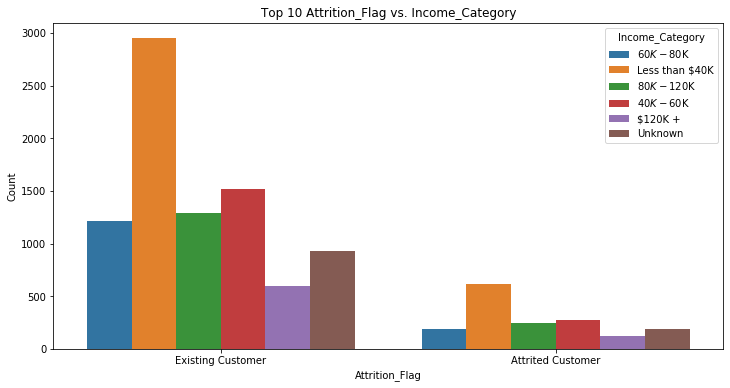

In [76]:
# Tabulation
tab = pd.crosstab(df['Attrition_Flag'], df['Income_Category'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition_Flag', hue='Income_Category')
plt.title("Top 10 Attrition_Flag vs. Income_Category")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.legend(title='Income_Category', loc='upper right')
plt.show()

In [77]:
# Create a contingency table of 'Income_Category' and 'Attrition_Flag'
contingency_table = pd.crosstab(df['Attrition_Flag'], df['Income_Category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 12.832259274756895
P-Value: 0.025002425704390617


The significant association between income category and customer attrition status suggests that income level may influence the likelihood of customer churn.

Customers in certain income categories may be more or less likely to attrite compared to others. For example, lower-income customers may have different needs, behaviors, or levels of satisfaction that contribute to higher attrition rates.

## Attrition_Flag and Card_Category

the crosstab is:
 Card_Category      Blue  Gold  Platinum  Silver
Attrition_Flag                                 
Attrited Customer  1519    21         5      82
Existing Customer  7917    95        15     473


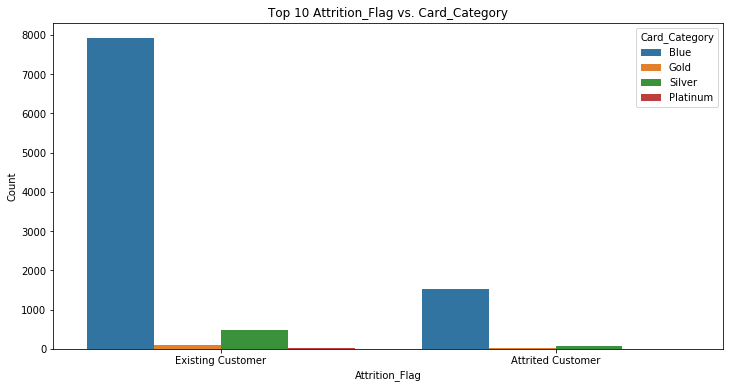

In [78]:
# Tabulation
tab = pd.crosstab(df['Attrition_Flag'], df['Card_Category'])
print('the crosstab is:\n',tab)

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition_Flag', hue='Card_Category')
plt.title("Top 10 Attrition_Flag vs. Card_Category")
plt.xlabel("Attrition_Flag")
plt.ylabel("Count")
plt.legend(title='Card_Category', loc='upper right')
plt.show()

In [79]:
# Create a contingency table of 'Card_Category' and 'Attrition_Flag'
contingency_table = pd.crosstab(df['Attrition_Flag'], df['Card_Category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 2.2342267000046805
P-Value: 0.5252382797994759


The lack of statistical significance suggests that card category may not be a strong predictor of customer attrition.

## Gender and Card Category

the crosstab is:
 Card_Category  Blue  Gold  Platinum  Silver
Gender                                     
F              5101    38         9     210
M              4335    78        11     345


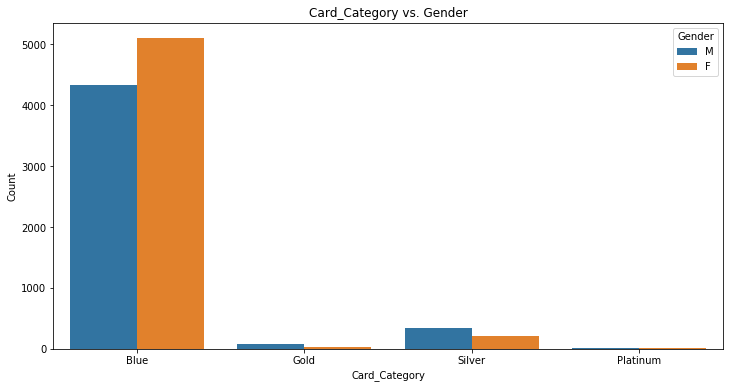

In [80]:
# Tabulation
tab = pd.crosstab(df['Gender'], df['Card_Category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Card_Category', hue='Gender')
plt.title("Card_Category vs. Gender")
plt.xlabel("Card_Category")
plt.ylabel("Count")
plt.legend(title='Gender', loc='upper right')
plt.show()

In [81]:
# Create a contingency table of 'Card_Category' and 'Gender'
contingency_table = pd.crosstab(df['Gender'], df['Card_Category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 75.0103508939681
P-Value: 3.604857850219599e-16


The very small p-value indicates that the association observed in the data is highly unlikely to be due to chance. Therefore, there is strong evidence against the null hypothesis of independence, suggesting that gender and card category are not independent of each other.

## Card_Category and Income_Category

the crosstab is:
 Card_Category    Blue  Gold  Platinum  Silver
Income_Category                              
$120K +           645    18         4      60
$40K - $60K      1675    15         1      99
$60K - $80K      1273    29         4      96
$80K - $120K     1395    21         2     117
Less than $40K   3403    24         4     130
Unknown          1045     9         5      53


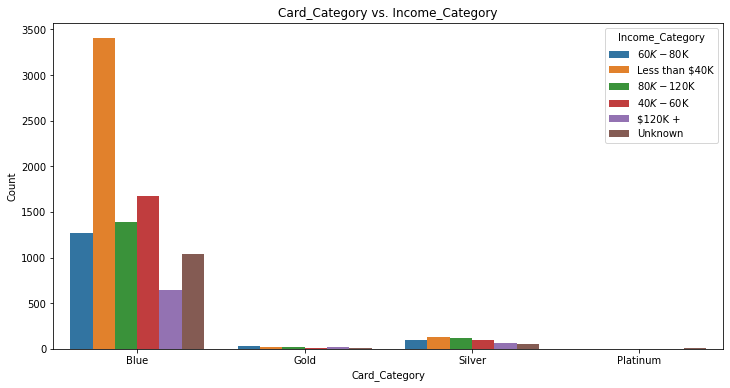

In [82]:
# Tabulation
tab = pd.crosstab(df['Income_Category'], df['Card_Category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Card_Category', hue='Income_Category')
plt.title("Card_Category vs. Income_Category")
plt.xlabel("Card_Category")
plt.ylabel("Count")
plt.legend(title='Income_Category', loc='upper right')
plt.show()

In [83]:
# Create a contingency table of 'Card_Category' and 'Income_Category'
contingency_table = pd.crosstab(df['Income_Category'], df['Card_Category'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 100.17134607596608
P-Value: 1.2106873689789959e-14


There is strong evidence against the null hypothesis of independence, suggesting that income category and card category are not independent of each other.

## Card_Category and Education_Level

the crosstab is:
 Card_Category    Blue  Gold  Platinum  Silver
Education_Level                              
College           940    15         0      58
Doctorate         422     5         2      22
Graduate         2899    36         8     185
High School      1888    26         1      98
Post-Graduate     476     5         3      32
Uneducated       1391    11         3      82
Unknown          1420    18         3      78


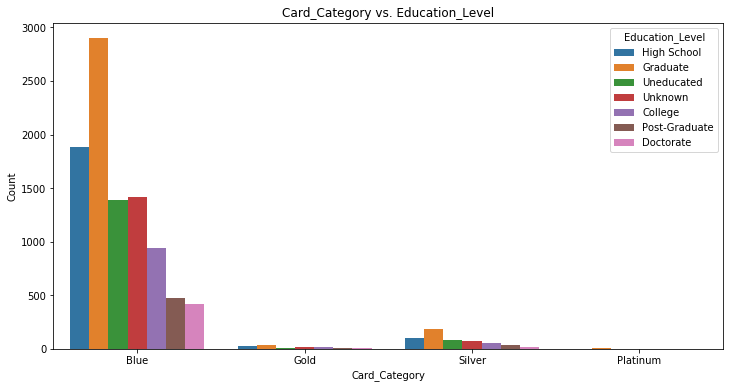

In [84]:
# Tabulation
tab = pd.crosstab(df['Education_Level'], df['Card_Category'])
print('the crosstab is:\n',tab)


# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Card_Category', hue='Education_Level')
plt.title("Card_Category vs. Education_Level")
plt.xlabel("Card_Category")
plt.ylabel("Count")
plt.legend(title='Education_Level', loc='upper right')
plt.show()

In [85]:
# Create a contingency table of 'Card_Category' and 'Education_Level'
contingency_table = pd.crosstab(df['Card_Category'], df['Education_Level'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 17.628878825370784
P-Value: 0.4803408255480883


The associated p-value is 0.480, indicating that there is no statistically significant association between education level and card category.

## Attrition_Flag and Customer_Age

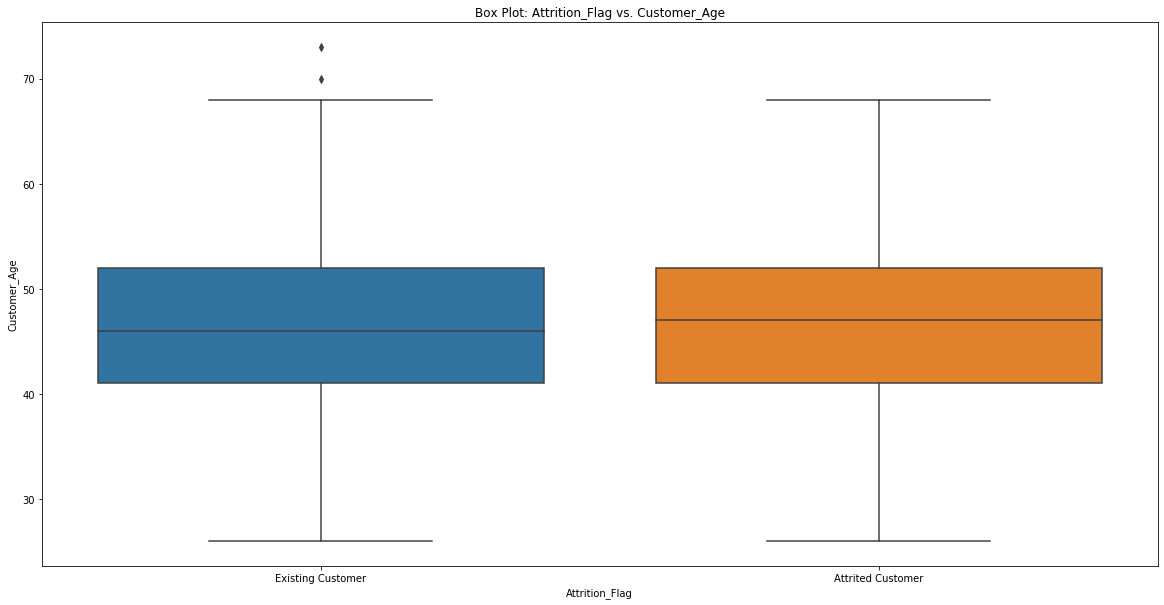

In [86]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Customer_Age')
plt.title('Box Plot: Attrition_Flag vs. Customer_Age')


# Display the plot
plt.show()

In [87]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Drop any rows with missing values
data = df[['Customer_Age', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Customer_Age ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                          sum_sq       df         F    PR(>F)
C(Attrition_Flag)     215.642367      1.0  3.356074  0.066987
Residual           650575.362669  10125.0       NaN       NaN


The ANOVA results indicate a no association between customer attrition status and customer age.


## Attrition_Flag and Months_on_book

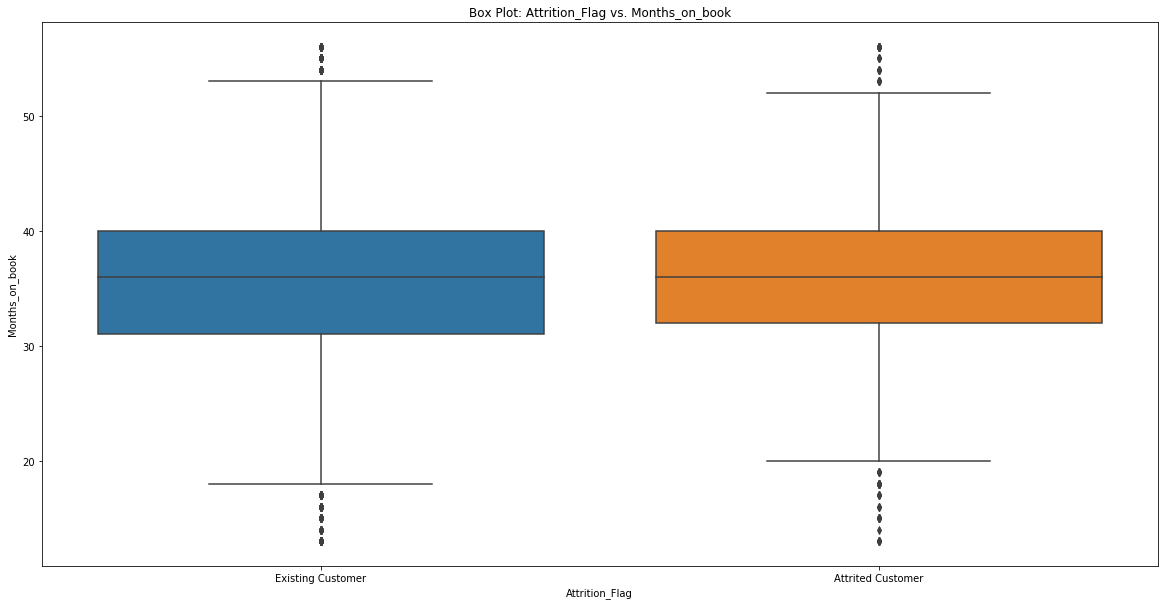

In [88]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Months_on_book')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Months_on_book')
plt.title('Box Plot: Attrition_Flag vs. Months_on_book')


# Display the plot
plt.show()

In [89]:
# Drop any rows with missing values
data = df[['Months_on_book', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Months_on_book ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                          sum_sq       df         F    PR(>F)
C(Attrition_Flag)     120.989841      1.0  1.897071  0.168437
Residual           645744.106831  10125.0       NaN       NaN


The duration of the customer-bank relationship, as represented by months on book, may not be a strong predictor of customer attrition.

## Attrition_Flag and Total_Relationship_Count

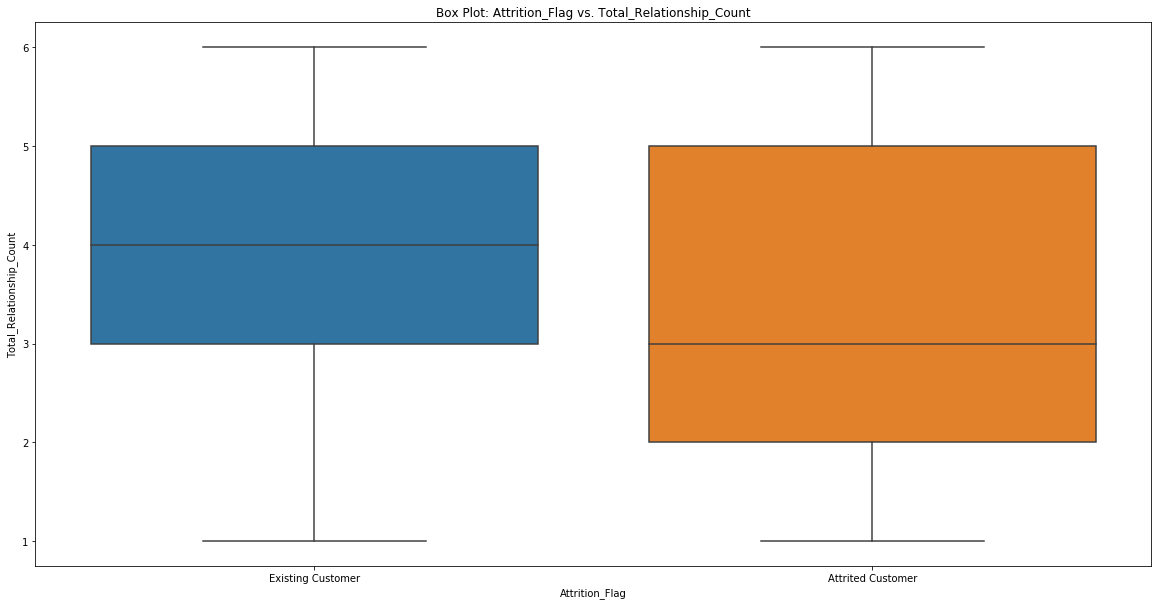

In [90]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Relationship_Count')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Relationship_Count')
plt.title('Box Plot: Attrition_Flag vs. Total_Relationship_Count')


# Display the plot
plt.show()

In [91]:
# Drop any rows with missing values
data = df[['Total_Relationship_Count', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Relationship_Count ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df           F        PR(>F)
C(Attrition_Flag)    550.529612      1.0  233.072886  4.829281e-52
Residual           23915.747666  10125.0         NaN           NaN


The ANOVA results indicate a moderate association between customer attrition status and Total_Relationship_Count.

Customers with higher relationship count are more likely to be existing customers 

In [92]:
attrited=df[df['Attrition_Flag']=='Attrited Customer']
percentage=(attrited['Total_Relationship_Count'].value_counts()/df['Total_Relationship_Count'].value_counts())*100
Attrition_percentage=pd.DataFrame({'relationship count':percentage.index,'Attrition percentage':percentage.values})
Attrition_percentage

,relationship count,Attrition percentage
0,1,25.604396
1,2,27.835881
2,3,17.353579
3,4,11.767782
4,5,12.004231
5,6,10.503751


## Attrition_Flag and Months_Inactive_12_mon

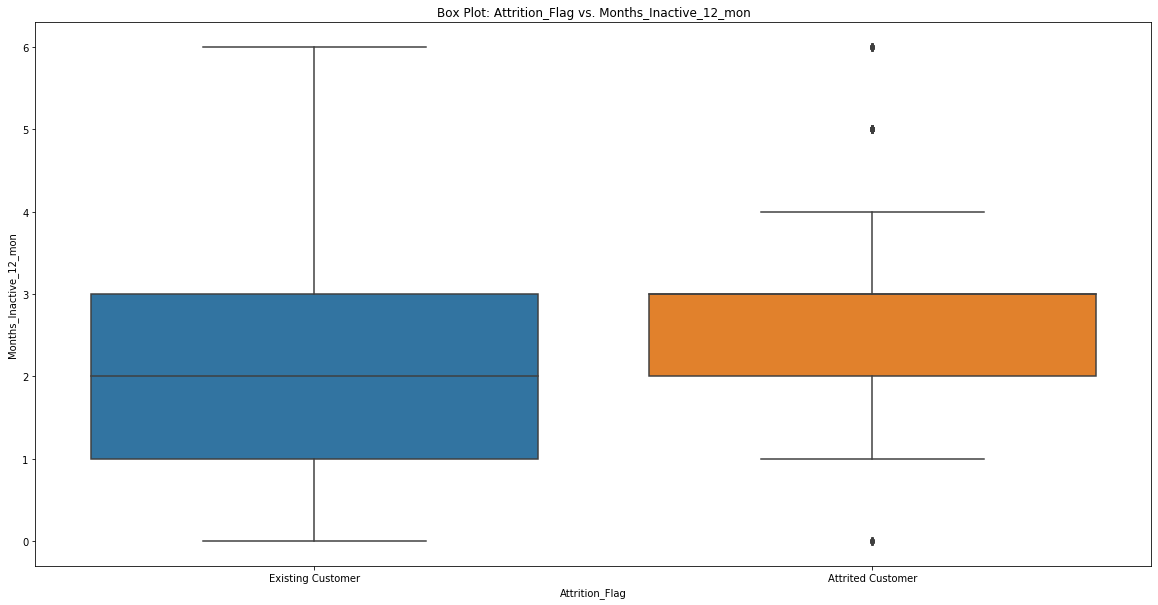

In [93]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Months_Inactive_12_mon')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Months_Inactive_12_mon')
plt.title('Box Plot: Attrition_Flag vs. Months_Inactive_12_mon')


# Display the plot
plt.show()

In [94]:
# Drop any rows with missing values
data = df[['Months_Inactive_12_mon', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Months_Inactive_12_mon ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df           F        PR(>F)
C(Attrition_Flag)    240.360899      1.0  240.910376  1.032664e-53
Residual           10101.906505  10125.0         NaN           NaN


The ANOVA results indicate a moderate association between customer attrition status and Months_Inactive_12_mon.


In [95]:
attrited=df[df['Attrition_Flag']=='Attrited Customer']
percentage=(attrited['Months_Inactive_12_mon'].value_counts()/df['Months_Inactive_12_mon'].value_counts())*100
inactive_percentage=pd.DataFrame({'Inactive month':percentage.index,'Attrition percentage':percentage.values})
inactive_percentage

,Inactive month,Attrition percentage
0,0,51.724138
1,1,4.478280
2,2,15.386959
3,3,21.476859
4,4,29.885057
5,5,17.977528
6,6,15.322581


## Attrition_Flag and Contacts_Count_12_mon

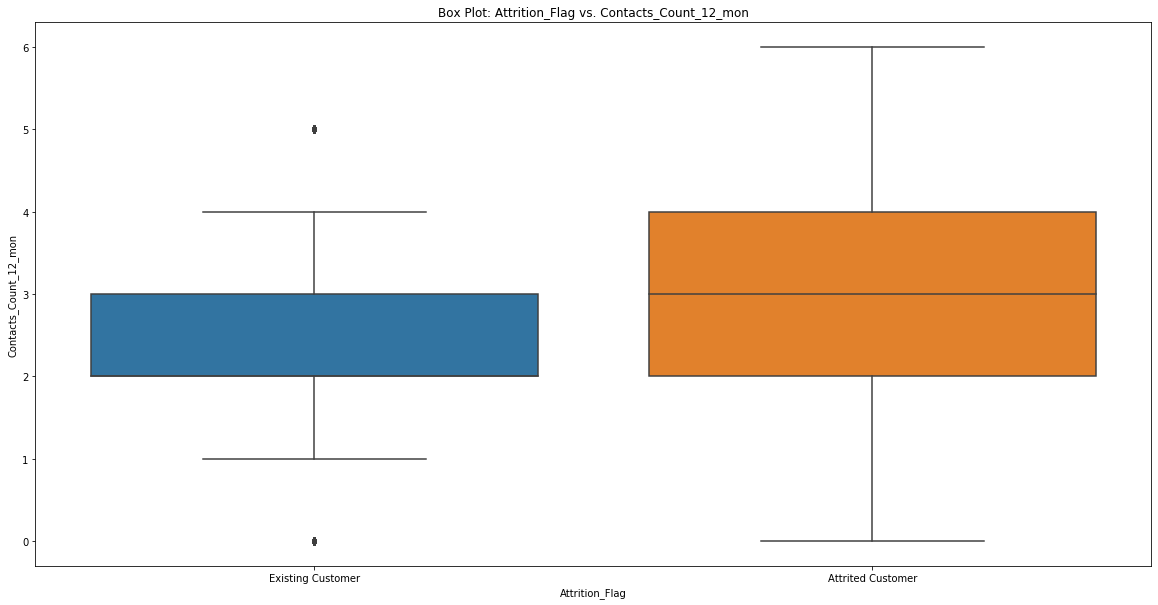

In [96]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Contacts_Count_12_mon')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Contacts_Count_12_mon')
plt.title('Box Plot: Attrition_Flag vs. Contacts_Count_12_mon')


# Display the plot
plt.show()

In [97]:
# Drop any rows with missing values
data = df[['Contacts_Count_12_mon', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Contacts_Count_12_mon ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df          F        PR(>F)
C(Attrition_Flag)    518.168835      1.0  441.86805  4.697490e-96
Residual           11873.362319  10125.0        NaN           NaN


The ANOVA results indicate a moderate association between customer attrition status and Contacts_Count_12_mon.

Customers who contacts more with the bank in a month are more likely to be attrited customers 

In [98]:
attrited=df[df['Attrition_Flag']=='Attrited Customer']
percentage=(attrited['Contacts_Count_12_mon'].value_counts()/df['Contacts_Count_12_mon'].value_counts())*100
Attrition_percentage=pd.DataFrame({'Contact Count':percentage.index,'Attrition percentage':percentage.values})
Attrition_percentage

,Contact Count,Attrition percentage
0,0,1.754386
1,1,7.204803
2,2,12.488379
3,3,20.147929
4,4,22.629310
5,5,33.522727
6,6,100.000000


## Attrition_Flag and Credit_Limit

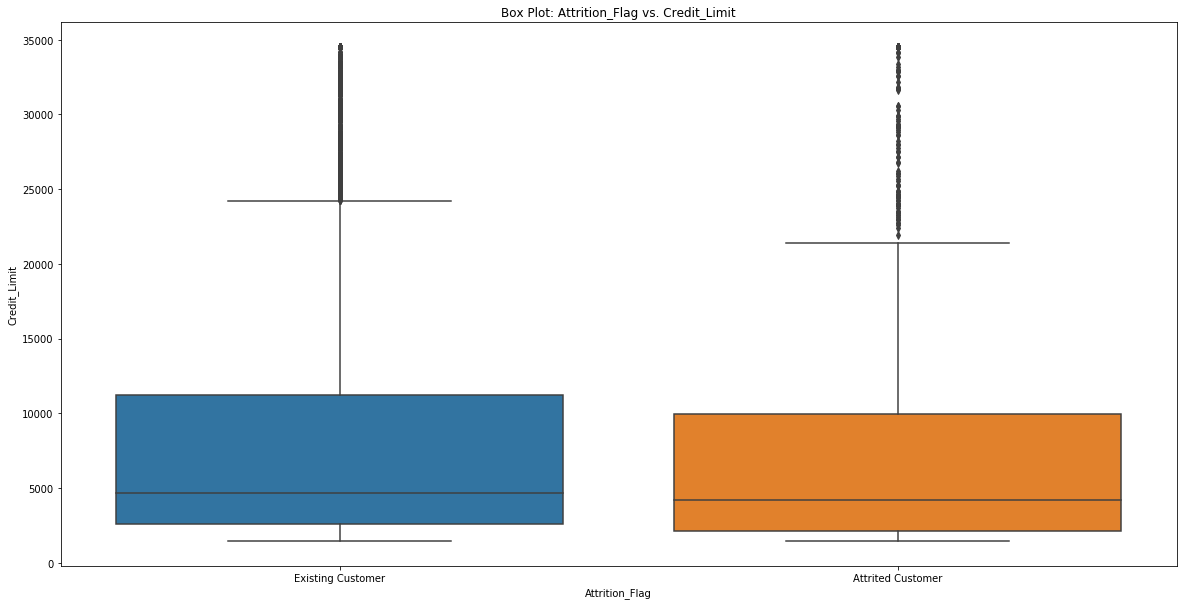

In [99]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Credit_Limit')
plt.title('Box Plot: Attrition_Flag vs. Credit_Limit')


# Display the plot
plt.show()

In [100]:
# Drop any rows with missing values
data = df[['Credit_Limit', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Credit_Limit ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df         F    PR(>F)
C(Attrition_Flag)  4.767191e+08      1.0  5.773729  0.016285
Residual           8.359902e+11  10125.0       NaN       NaN


The ANOVA results indicate a moderate association between customer attrition status and Credit_Limit.

Customers who has more credit limit are more likely to be existing customers.

## Attrition_Flag and Total_Revolving_Bal

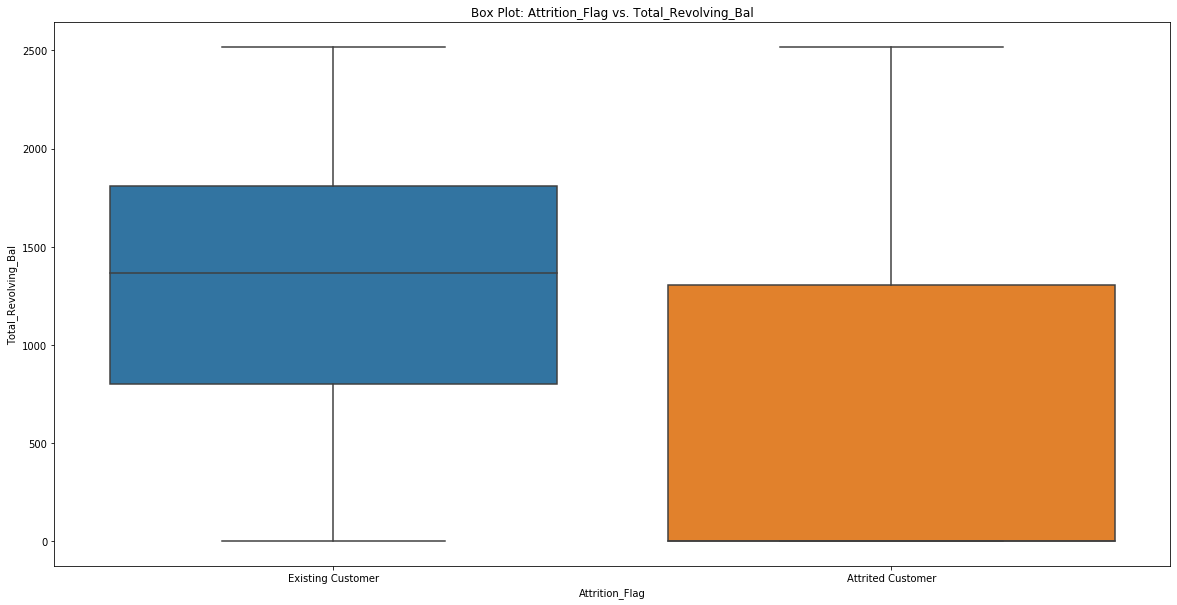

In [101]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Revolving_Bal')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Revolving_Bal')
plt.title('Box Plot: Attrition_Flag vs. Total_Revolving_Bal')


# Display the plot
plt.show()

In [102]:
# Drop any rows with missing values
data = df[['Total_Revolving_Bal', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Revolving_Bal ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df           F         PR(>F)
C(Attrition_Flag)  4.653994e+08      1.0  752.702408  6.630148e-160
Residual           6.260334e+09  10125.0         NaN            NaN


The ANOVA results indicate a moderate association between customer attrition status and Total_Revolving_Bal.

Customers who has more higher revolving balance are more likely to be existing customers

## Attrition_Flag and Avg_Open_To_Buy

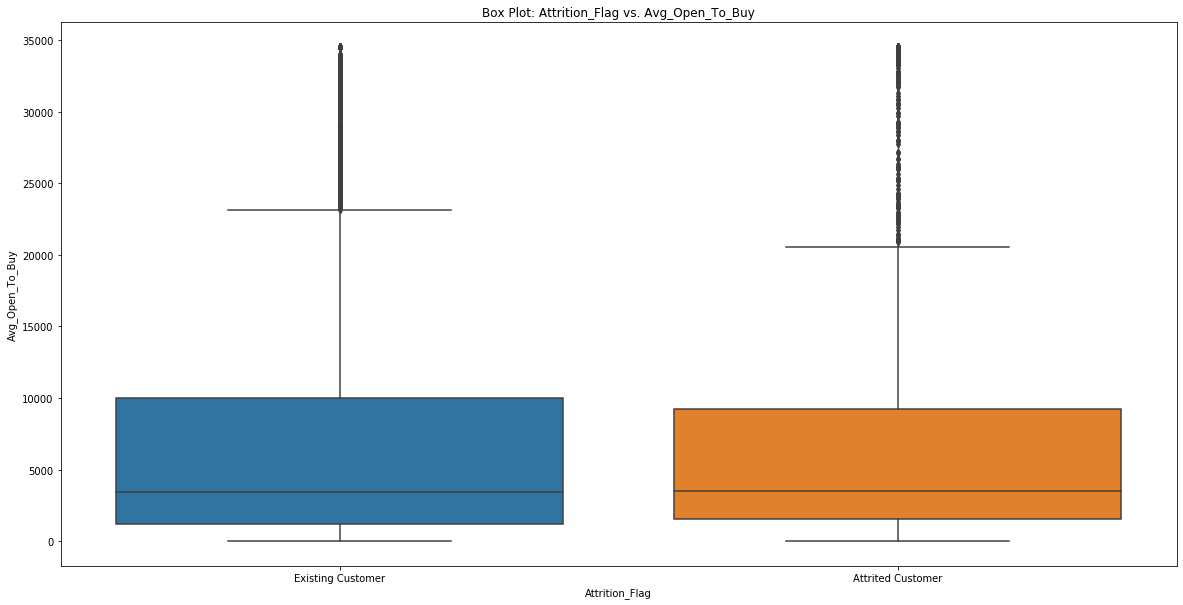

In [103]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Open_To_Buy')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Avg_Open_To_Buy')
plt.title('Box Plot: Attrition_Flag vs. Avg_Open_To_Buy')


# Display the plot
plt.show()

In [104]:
# Drop any rows with missing values
data = df[['Avg_Open_To_Buy', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Avg_Open_To_Buy ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df         F    PR(>F)
C(Attrition_Flag)  6.800754e+04      1.0  0.000823  0.977116
Residual           8.368182e+11  10125.0       NaN       NaN


Average open to buy represents the average amount of credit available for a customer to spend, but it may not directly impact their likelihood of churn.

## Attrition_Flag and Total_Amt_Chng_Q4_Q1

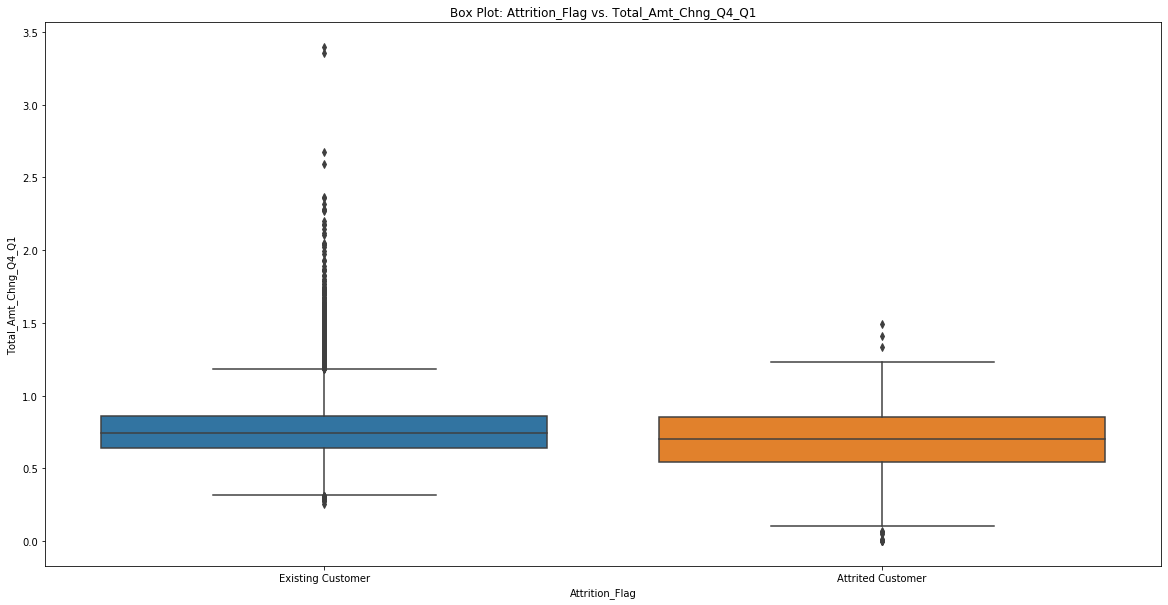

In [105]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Amt_Chng_Q4_Q1')
plt.title('Box Plot: Attrition_Flag vs. Total_Amt_Chng_Q4_Q1')


# Display the plot
plt.show()

In [106]:
# Drop any rows with missing values
data = df[['Total_Amt_Chng_Q4_Q1', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Amt_Chng_Q4_Q1 ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
C(Attrition_Flag)    8.358052      1.0  176.961638  4.836643e-40
Residual           478.212528  10125.0         NaN           NaN


The ANOVA results indicate a moderate association between customer attrition status and Total_Amt_Chng_Q4_Q1.

Customers who has more transaction amount change from quarter 1 to 4 are more likely to be existing customers 

## Attrition_Flag and Total_Trans_Amt

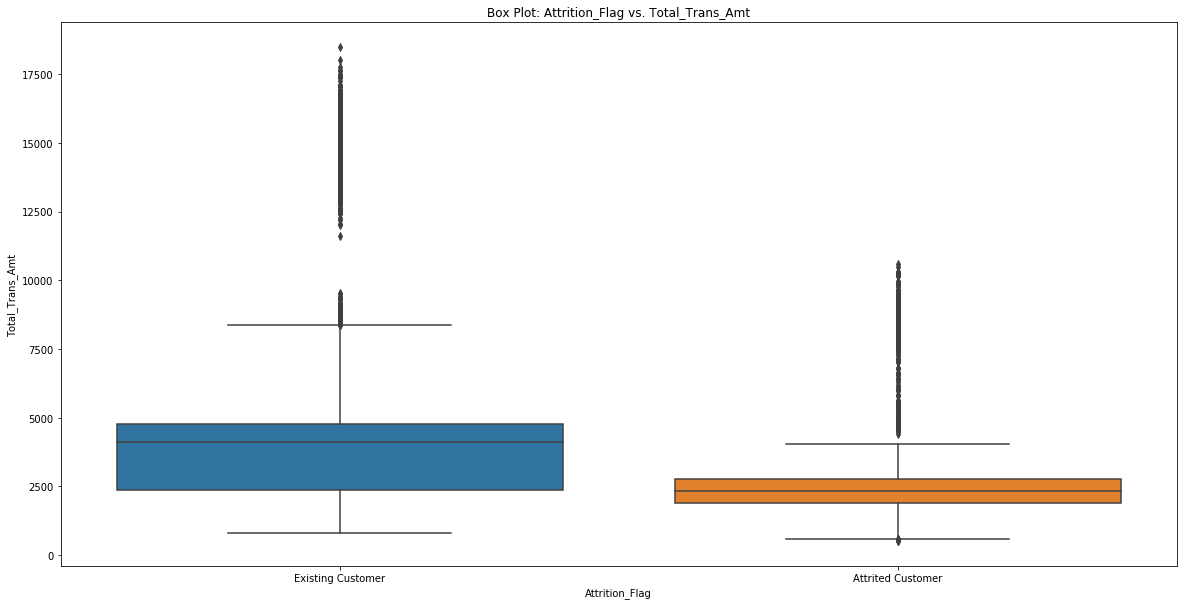

In [107]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Trans_Amt')
plt.title('Box Plot: Attrition_Flag vs. Total_Trans_Amt')


# Display the plot
plt.show()

In [108]:
# Drop any rows with missing values
data = df[['Total_Trans_Amt', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Trans_Amt ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df           F        PR(>F)
C(Attrition_Flag)  3.321765e+09      1.0  296.227714  1.857439e-65
Residual           1.135372e+11  10125.0         NaN           NaN


The ANOVA results indicate a moderate association between customer attrition status and Total_Trans_Amt.


Customers who has total transaction amount larger are more likely to be existing customers 

## Attrition_Flag and Total_Trans_Ct

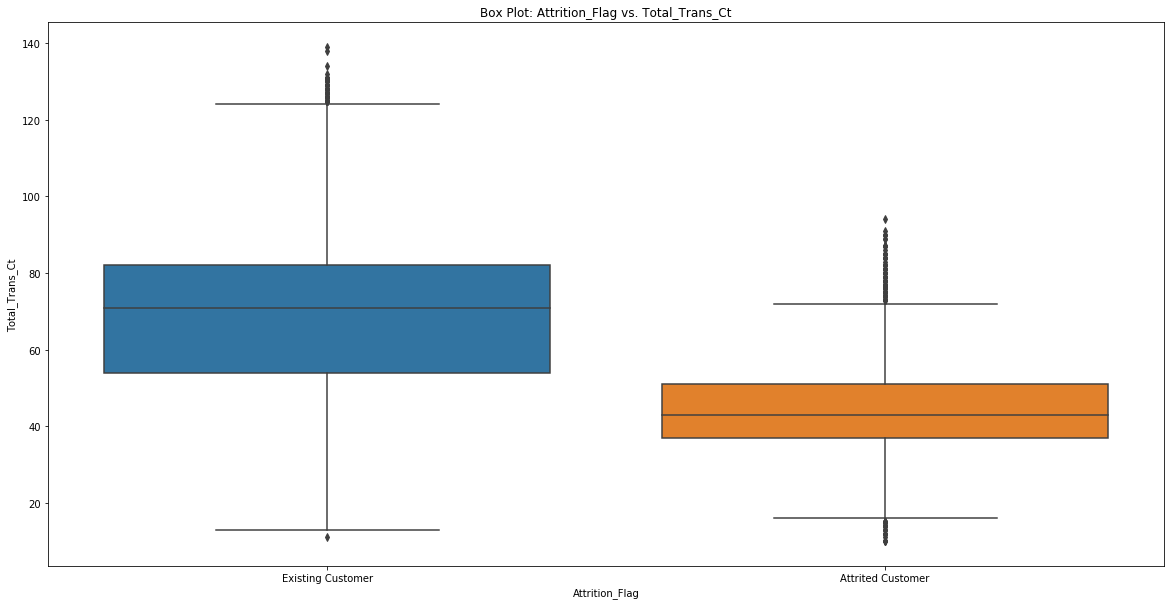

In [109]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Ct')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Trans_Ct')
plt.title('Box Plot: Attrition_Flag vs. Total_Trans_Ct')


# Display the plot
plt.show()

In [110]:
# Drop any rows with missing values
data = df[['Total_Trans_Ct', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Trans_Ct ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                         sum_sq       df            F  PR(>F)
C(Attrition_Flag)  7.695721e+05      1.0  1620.121692     0.0
Residual           4.809465e+06  10125.0          NaN     NaN


The ANOVA results indicate a strong association between customer attrition status and Total_Trans_Ct


Customers who has more transaction count are more likely to be existing customers 

## Attrition_Flag and Total_Ct_Chng_Q4_Q1

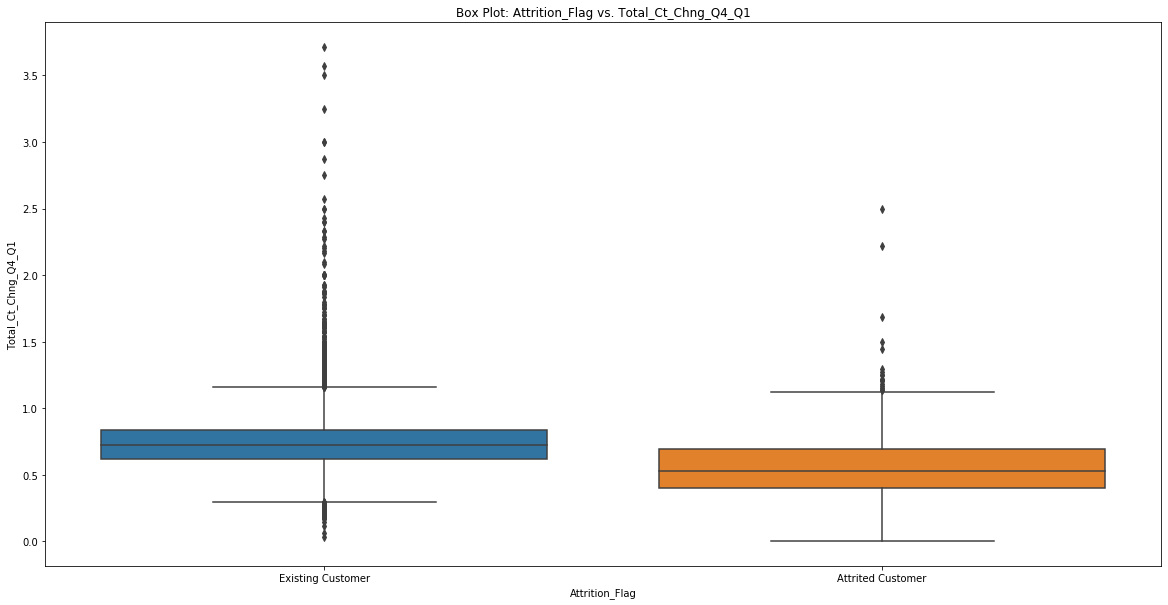

In [111]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Total_Ct_Chng_Q4_Q1')
plt.title('Box Plot: Attrition_Flag vs. Total_Ct_Chng_Q4_Q1')


# Display the plot
plt.show()

In [112]:
# Drop any rows with missing values
data = df[['Total_Ct_Chng_Q4_Q1', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Total_Ct_Chng_Q4_Q1 ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F         PR(>F)
C(Attrition_Flag)   48.290724      1.0  930.078416  1.647725e-195
Residual           525.701454  10125.0         NaN            NaN


The ANOVA results indicate a moderate association between customer attrition status and Total_Ct_Chng_Q4_Q1


Customers who has more transaction count from quarter 1 to 4 are more likely to be existing customers 

## Attrition_Flag and Avg_Utilization_Ratio

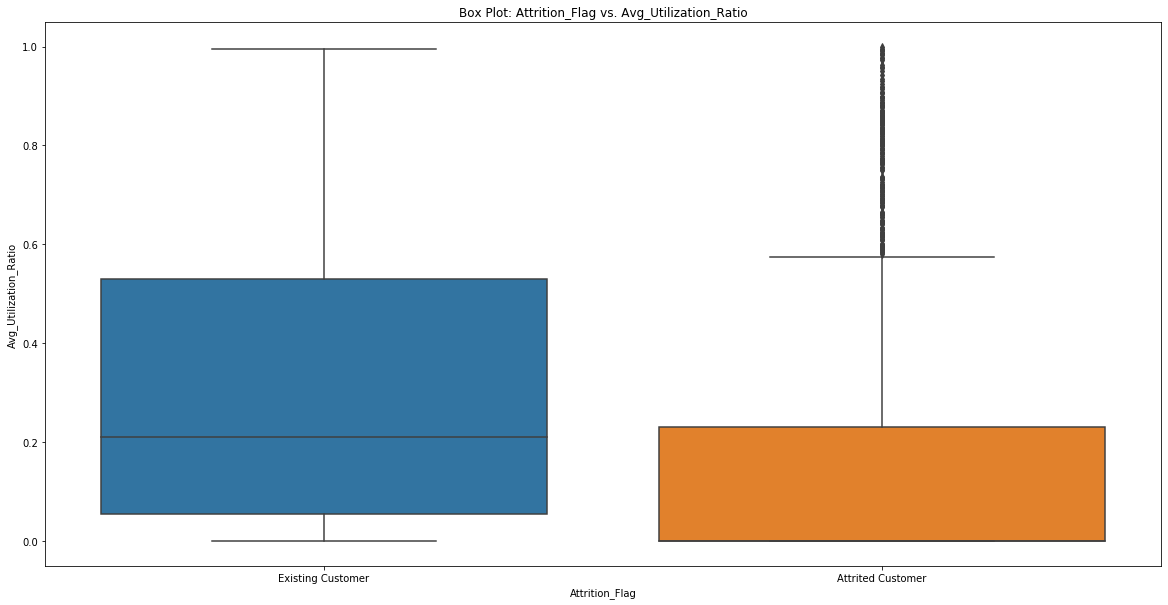

In [113]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio')

# Set labels and title
plt.xlabel('Attrition_Flag')
plt.ylabel('Avg_Utilization_Ratio')
plt.title('Box Plot: Attrition_Flag vs. Avg_Utilization_Ratio')


# Display the plot
plt.show()

In [114]:
# Drop any rows with missing values
data = df[['Avg_Utilization_Ratio', 'Attrition_Flag']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('Avg_Utilization_Ratio ~ C(Attrition_Flag)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq       df           F        PR(>F)
C(Attrition_Flag)   24.497659      1.0  332.876795  3.357689e-73
Residual           745.136933  10125.0         NaN           NaN


The ANOVA results indicate a statistically significant association between customer attrition status (Attrition_Flag) and the average utilization ratio (Avg_Utilization_Ratio).

Customers with higher average utilization are more likely to be existing customers

# KEY INSIGHTS:

#### Customer Age and Tenure: 

There's a strong positive correlation between customer age and months on book, indicating that older customers tend to have been with the bank for a longer duration. This suggests that customer retention tends to increase with age.

#### Credit Utilization and Behavior: 

Higher credit limits are associated with higher available credit and may influence customer spending behavior. 

Customers with higher revolving balances tend to have higher average utilization ratios, indicating a propensity to utilize more of their available credit.

#### Spending Patterns:

Customers who increase their total transaction amount from one quarter to the next also tend to increase their total transaction count, indicating a pattern of increased spending and engagement with the bank's products and services.

#### Relationship with the Bank:

There's a negative correlation between the number of relationships a customer has with the bank and their total transaction amounts. Customers with fewer relationships may engage in more transactional activity, while those with more relationships may distribute their transactions across multiple accounts or channels.

#### Credit Behavior and Utilization: 

Customers with higher credit limits relative to their spending tend to utilize a smaller proportion of their available credit, indicating healthier credit behavior. Conversely, customers with lower credit limits may have higher utilization ratios, which could indicate potential financial strain or higher credit risk.

### Factors Influencing Attrition: 

Income level, gender, and certain banking behaviors (such as inactivity, low transaction counts, or lower credit limits) are associated with customer attrition. Lower-income customers and those with certain behavioral patterns are more likely to churn.

#### Education and Marital Status: 

While education level and marital status may not directly predict attrition, they still have some influence, albeit less significant than other factors like income level and certain banking behaviors.

#### ANOVA Results: 

Moderate associations are observed between customer attrition status and various factors such as total relationship count, months inactive, contacts count, credit limit, total revolving balance, transaction amounts, transaction counts, and transaction count changes.

#### Average Utilization Ratio: 

There's a significant association between customer attrition status and average utilization ratio, indicating that customers with higher average utilization ratios are more likely to be retained.

#### Existing Customer Profiles: 

Certain characteristics such as higher relationship counts, lower inactivity, more frequent contact with the bank, higher credit limits, higher revolving balances, and consistent transaction behavior are associated with existing customers.

# Filling NULL Values

In [115]:
df.replace("Unknown", pd.NA, inplace=True)

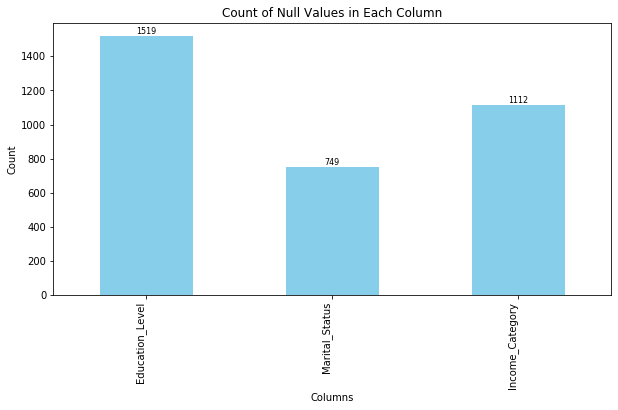

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Count null values in each column
null_counts = df.isnull().sum()

# Filter columns with non-zero null counts
null_counts = null_counts[null_counts > 0]

# Define colors for null and non-null values
colors = ['skyblue' if pd.notnull(val) else 'red' for val in null_counts]

# Plotting
plt.figure(figsize=(10, 5))
bars = null_counts.plot(kind='bar', color=colors)
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

# Annotate bars with null counts
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height + 0.1, 
                 f'{int(height)}', 
                 ha='center', 
                 va='bottom', 
                 color='black', 
                 fontsize=8)

plt.show()


#### INCOME

In [120]:
mode_fill = lambda x: x.fillna(x.mode().iloc[0])

# Group by 'Card_Category' and 'Attrition_Flag' and fill null values in 'Income_Category' with mode
df['Income_Category'] = df.groupby(['Card_Category', 'Attrition_Flag'])['Income_Category'].transform(mode_fill)

#### EDUCATION

In [121]:
mode_fill = lambda x: x.fillna(x.mode().iloc[0])

# Group by 'Attrition_Flag' and fill null values in 'Education_Level' and 'Marital_Status' with mode
df['Education_Level'] = df.groupby('Attrition_Flag')['Education_Level'].transform(mode_fill)

#### Marital_Status column

In [122]:
mode_fill = lambda x: x.fillna(x.mode().iloc[0])
df['Marital_Status'] = df.groupby('Attrition_Flag')['Marital_Status'].transform(mode_fill)

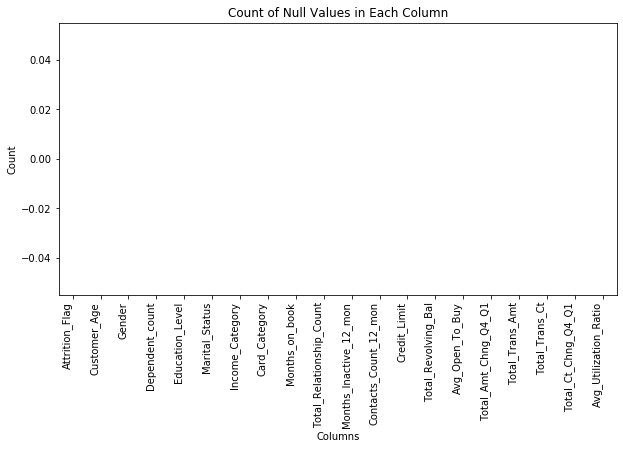

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# Count null values in each column
null_counts = df.isnull().sum()

# Define colors for null and non-null values
colors = ['skyblue' if pd.notnull(val) else 'red' for val in null_counts]

# Plotting
plt.figure(figsize=(10, 5))
bars = null_counts.plot(kind='bar', color=colors)
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

# Annotate bars with null counts
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height + 0.1, 
                 f'{int(height)}', 
                 ha='center', 
                 va='bottom', 
                 color='black', 
                 fontsize=8)

plt.show()


# OUTLIERS TREATMENT

In [131]:
numeric_cols = df.select_dtypes(include=np.number).columns

q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1

ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

# Identify outliers
outliers_upper = df[numeric_cols] > ul
outliers_lower = df[numeric_cols] < ll

# Replace outliers with ul and ll
df[numeric_cols] = df[numeric_cols].mask(outliers_upper, ul, axis=1)
df[numeric_cols] = df[numeric_cols].mask(outliers_lower, ll, axis=1)

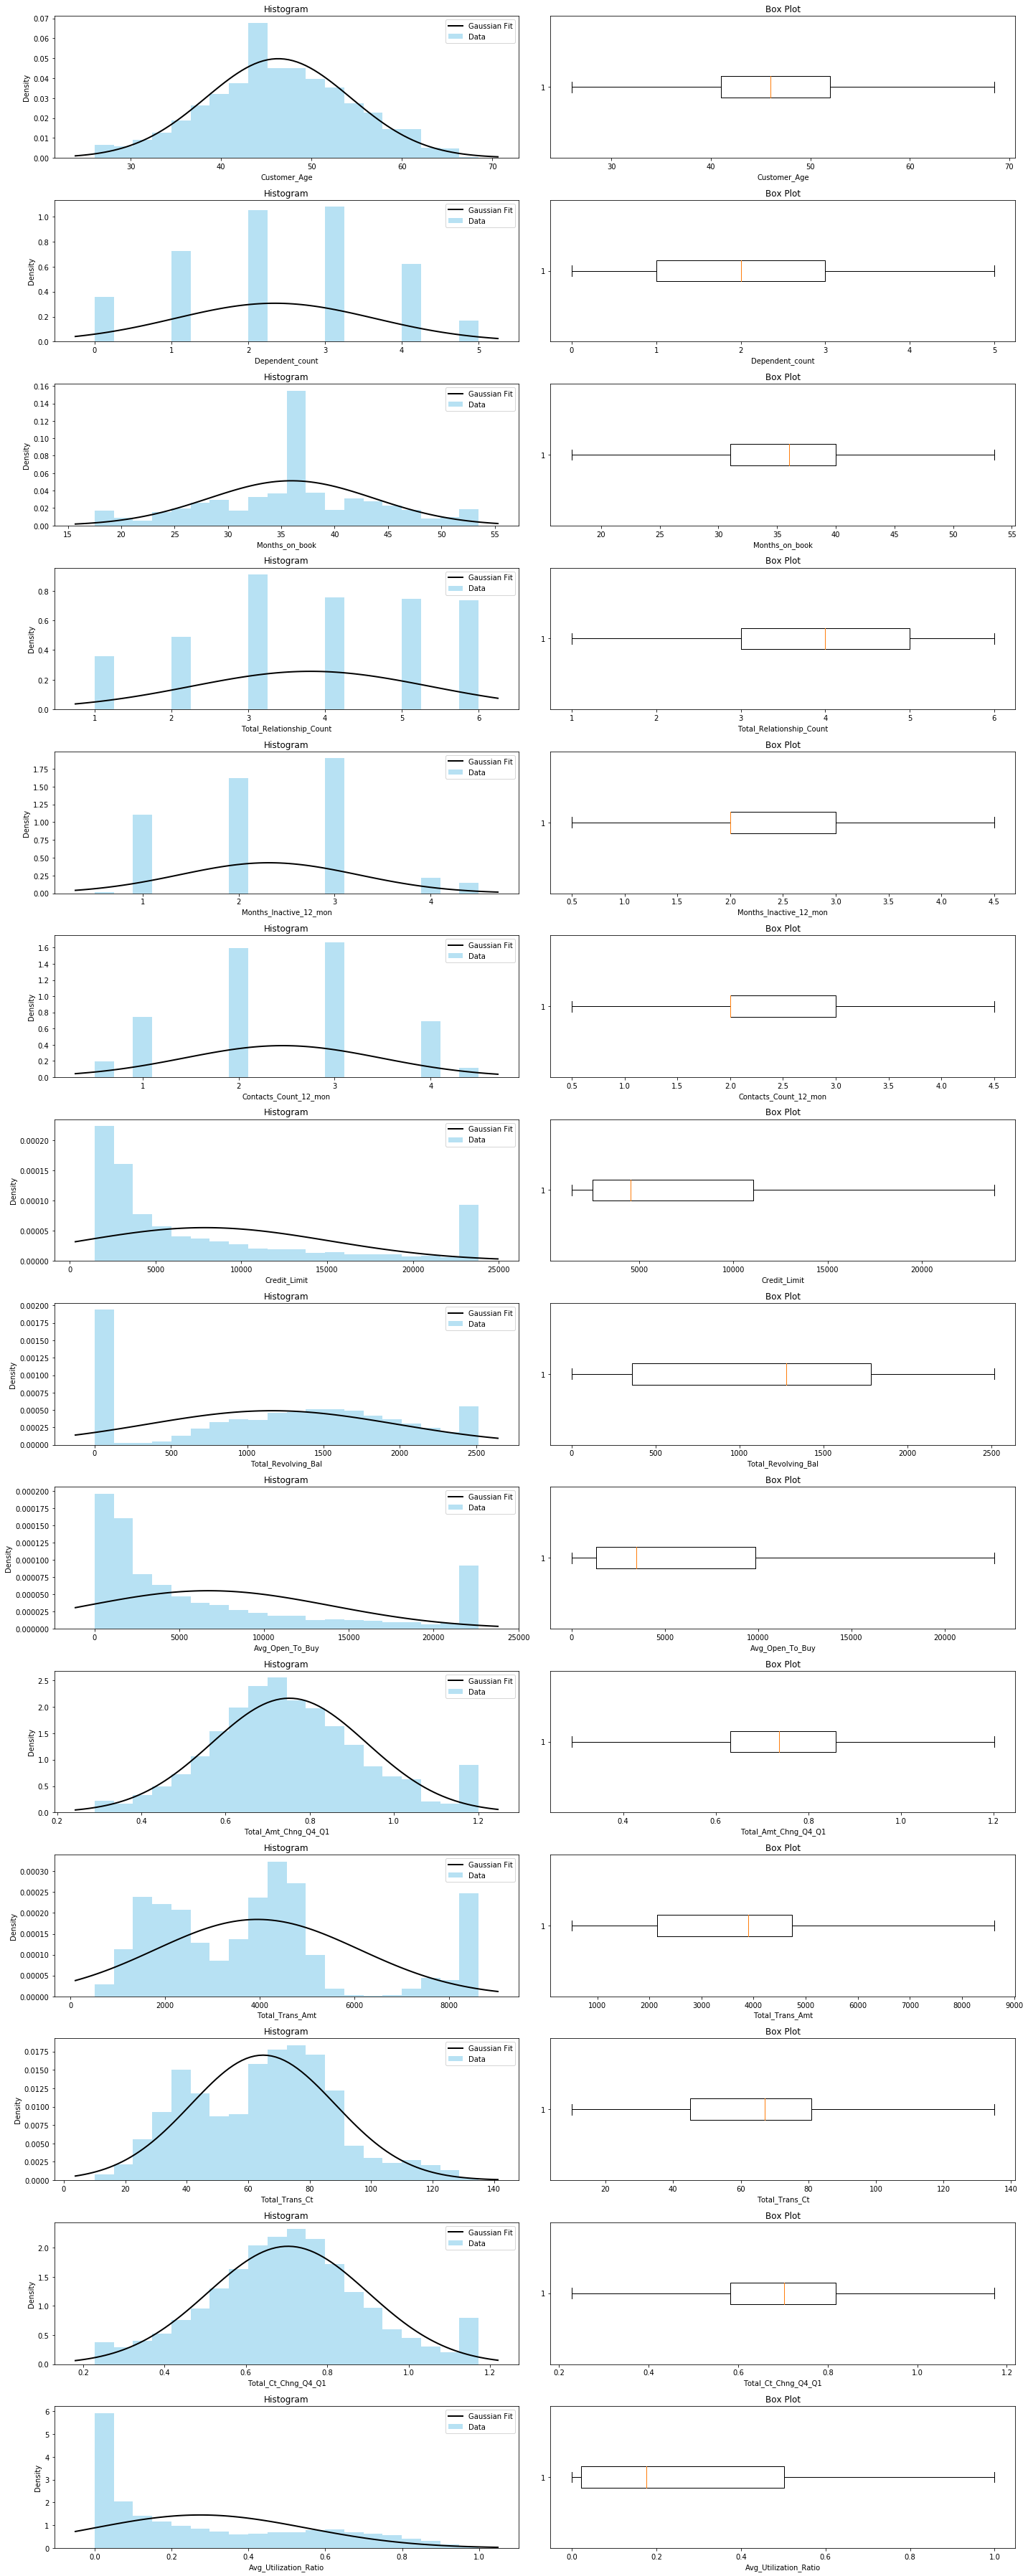

In [132]:
from scipy.stats import norm

# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5, wspace=10)  # Adjust the width space here

# Generate histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    axes[i, 0].hist(df[column], bins=20, color='skyblue', density=True, alpha=0.6, label='Data')
    
    # Plot Gaussian curve
    mu, sigma = df[column].mean(), df[column].std()
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    axes[i, 0].plot(x, p, 'k', linewidth=2, label='Gaussian Fit')
    
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].set_title('Histogram')
    axes[i, 0].legend()

    # Box plot
    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()


# TRANSFORMATION

In [133]:
df.kurt()

Customer_Age               -0.294289
Dependent_count            -0.683017
Months_on_book              0.071256
Total_Relationship_Count   -1.006131
Months_Inactive_12_mon     -0.592287
Contacts_Count_12_mon      -0.774938
Credit_Limit                0.085967
Total_Revolving_Bal        -1.145992
Avg_Open_To_Buy             0.067205
Total_Amt_Chng_Q4_Q1        0.131033
Total_Trans_Amt            -0.025300
Total_Trans_Ct             -0.369589
Total_Ct_Chng_Q4_Q1         0.090811
Avg_Utilization_Ratio      -0.794972
dtype: float64

In [134]:
df.skew()

Customer_Age               -0.035409
Dependent_count            -0.020826
Months_on_book             -0.063500
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.135221
Contacts_Count_12_mon      -0.033061
Credit_Limit                1.197249
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.190498
Total_Amt_Chng_Q4_Q1        0.329036
Total_Trans_Amt             0.837030
Total_Trans_Ct              0.152973
Total_Ct_Chng_Q4_Q1         0.129075
Avg_Utilization_Ratio       0.718008
dtype: float64

### LOG TRANSFORMATION

In [135]:
import numpy as np

# List of columns to log-transform
columns_to_log_transform = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

# Log-transform the columns
for column in columns_to_log_transform:
    df[column] = np.log1p(df[column])


# STANDARDIZING THE DATASET

In [136]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Apply standard scaling to numerical columns
df_scaled = df.copy()  # Make a copy of the DataFrame to preserve the original data
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])



In [137]:
df_scaled.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,-0.165368,M,0.503368,High School,Married,$60K - $80K,Blue,0.392971,0.763943,-1.414034,0.528081,0.984419,-0.473422,0.986030,2.436489,-1.873862,-0.973954,2.375918,-0.783903
1,Existing Customer,0.333718,F,2.043199,Graduate,Single,Less than $40K,Blue,1.036214,1.407306,-1.414034,-0.446831,0.498833,-0.366667,0.609139,2.436489,-1.664682,-1.357433,2.375918,-0.586923
2,Existing Customer,0.583262,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.007025,0.120579,-1.414034,-1.909199,-0.497066,-1.426858,0.000142,2.436489,-1.007758,-1.911349,2.375918,-1.070945
3,Existing Customer,-0.789227,F,1.273283,High School,Married,Less than $40K,Blue,-0.250272,-0.522785,1.810811,-1.421743,-0.532298,1.661686,-1.149844,2.436489,-1.833499,-1.911349,2.375918,1.669535
4,Existing Customer,-0.789227,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.922704,0.763943,-1.414034,-1.909199,-0.133563,-1.426858,0.254284,2.436489,-2.458386,-1.570478,2.375918,-1.070945
